<a href="https://colab.research.google.com/github/dasmiq/idi-cites/blob/main/idi_cites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Citations of Perseus Greek and Latin texts in IDI books

This notebook merges the passim output with Perseus and Harvard metadata and gives some example plots.

We start by loading some tidyverse libraries.

In [1]:
suppressPackageStartupMessages({
  library(dplyr)
  library(ggplot2)
  library(stringr)
})

First, we load information on titles and groups (i.e., usually authors) of CTS works.

In [2]:
works <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/works.csv", header=TRUE)

We load word counts of the editions (i.e., not translations) of CTS works.

In [3]:
work.words <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/work-words.csv", header=TRUE)

We load data that computes the longest common subsequence between a CTS works citable chunks and the passim alignment, weighted by the length of the aligned chunks. This serves as a proxy for whether an IDI contains an edition of (part of) a CTS work.

In [4]:
overlap <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/overlap.csv", header=TRUE) |>
    mutate(wlcs=if_else(wlcs < lblcs, lblcs, wlcs)) |> mutate(wover=wlcs/tlen)

In [5]:
lab.over <- overlap |> mutate(urn=str_replace(edition, "\\.[^.]+$", "")) |> left_join(works, by="urn") |> select(-c("group"))

Considering books that cover at least 10% of a work's chunks in order, we can count the works with the most editions.

In [6]:
lab.over |> filter(wover >= 0.1) |> group_by(urn, author, title) |> count() |> ungroup() |>
  mutate(language=if_else(str_detect(urn, "greekLit"), "Greek", "Latin")) |>
  filter(language == "Greek") |>
  select(urn, author, title, n) |>
  arrange(-n) |> head(40)

urn,author,title,n
<chr>,<chr>,<chr>,<int>
urn:cts:greekLit:tlg0031.tlg010,New Testament,Letter to the Ephesians,322
urn:cts:greekLit:tlg0031.tlg001,New Testament,Gospel according to Matthew,300
urn:cts:greekLit:tlg0031.tlg017,New Testament,Letter to Titus,292
urn:cts:greekLit:tlg0031.tlg012,New Testament,Epistle to the Colossians,283
urn:cts:greekLit:tlg0031.tlg004,New Testament,Gospel of John,280
urn:cts:greekLit:tlg0031.tlg015,New Testament,First Epistle to Timothy,277
urn:cts:greekLit:tlg0031.tlg003,New Testament,Gospel according to Luke,274
urn:cts:greekLit:tlg0031.tlg009,New Testament,Galatians,269
urn:cts:greekLit:tlg0031.tlg011,New Testament,Letter to the Philippians,266


We then download data on _all_ alignments, not just full editions, between CTS texts and IDI books. Since it's large, we first download the file and then load into R.

In [7]:
#cites <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/cites.csv.gz")))),
#  header=TRUE)

system("wget https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/cites.csv.gz")

In [8]:
cites <- read.csv("cites.csv.gz", header=TRUE)

We now grab selected fields of book-level metadata on IDI books.

In [9]:
idi <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/idi-meta.csv.gz")))),
  header=TRUE)

In [10]:
count(idi)

n
<int>
983004


We join the full citation data with the data on editions. Any book that has contiguous coverage of at least 10% of a works citations is considered an edition.

In [11]:
ed.cites <- overlap |> filter(wover >= 0.1) |> mutate(work=str_replace(edition, "\\.[^.]+$", "")) |> group_by(work, book) |> summarize(eds=n(), .groups="drop") |>
  right_join(cites, by=c("work", "book"))

Check IDI books with weird dates.

In [12]:
idi |> filter(!str_detect(date1_src, "[0-9u][0-9u][0-9u][0-9u]") & date1_src != "")

book,title,author,date1_src,date2_src,date_types_src,language_src,language_gen,ocr_score_src,ocr_score_gen
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
32044014499081,Reports of the Immigration Commission.,United States.,1,,unknown code: 2,eng,eng,90,91
32044058285594,Reports of the Immigration Commission.,United States.,1,,unknown code: 2,eng,eng,92,98
32044018934927,Reports of the Immigration Commission.,United States.,1,,unknown code: 2,eng,eng,91,98
32044108123936,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,63,88
32044108123944,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,62,90
32044108123969,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,61,84
32044108123985,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,73,91
32044108123993,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,70,91
32044108124009,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,67,88


Note that at least two-thirds of the IDI books have at least one Greek or Latin quotation.

In [13]:
ed.cites |> filter(hits >= 1) |> select(book) |> distinct() |> count()

n
<int>
597441


Convert IDI's two string date fields into years and pick the lower one.

In [14]:
idi.dated <- idi |>
  mutate(year=suppressWarnings(as.integer(date1_src)), year2=suppressWarnings(as.integer(date2_src))) |>
  mutate(year=if_else(year2 < year & !is.na(year2) & year2 > 1400, year2, year))

Join all the citation data and metadata together into one dataframe.

In [15]:
meta.cites <- ed.cites |>
  mutate(is.edition=(!is.na(eds) & eds >= 1)) |> select(-eds) |>
  inner_join(works |> mutate(work=urn, work.label=paste(author, title, sep=", ")) |>
                      select(work, work.author=author, work.title=title, work.label), by="work") |>
  inner_join(work.words, by="work") |>
  inner_join(select(idi.dated, book, author, title, year, language=language_gen), by="book")


We're finally ready for the first example plot! Grab editions of Thucydides and plot a histogram of the books' publication dates. The IDI corpus doesn't link multivolume works, e.g., in 1759.

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


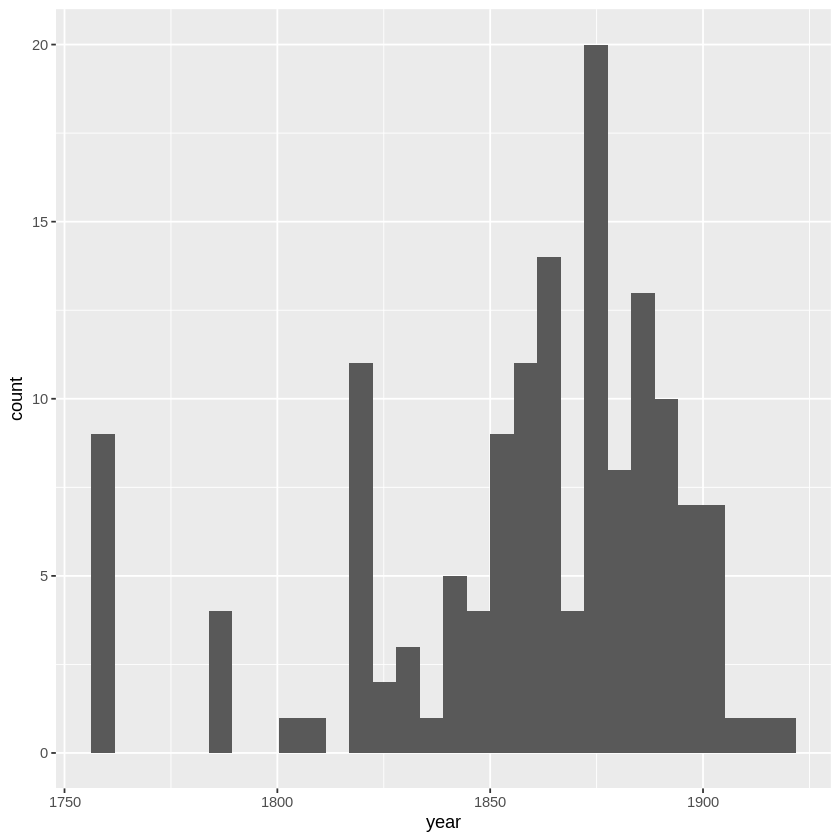

In [16]:
thuc.eds <- meta.cites |> filter(is.edition & work == "urn:cts:greekLit:tlg0003.tlg001")

ggplot(thuc.eds, aes(year)) + geom_histogram()

List the full data for those Thucydides editions.

In [17]:
thuc.eds |> mutate(book=tolower(book)) |> arrange(year)

work,book,hits,is.edition,work.author,work.title,work.label,words,author,title,year,language
<chr>,<chr>,<int>,<lgl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
urn:cts:greekLit:tlg0003.tlg001,hn5xhj,540,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5xhm,555,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5xhp,767,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5xhq,612,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6h,613,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6i,619,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6j,716,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6l,535,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6n,556,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell


Plot histograms for editions of Thucydides, Herodotus, and Homer.

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


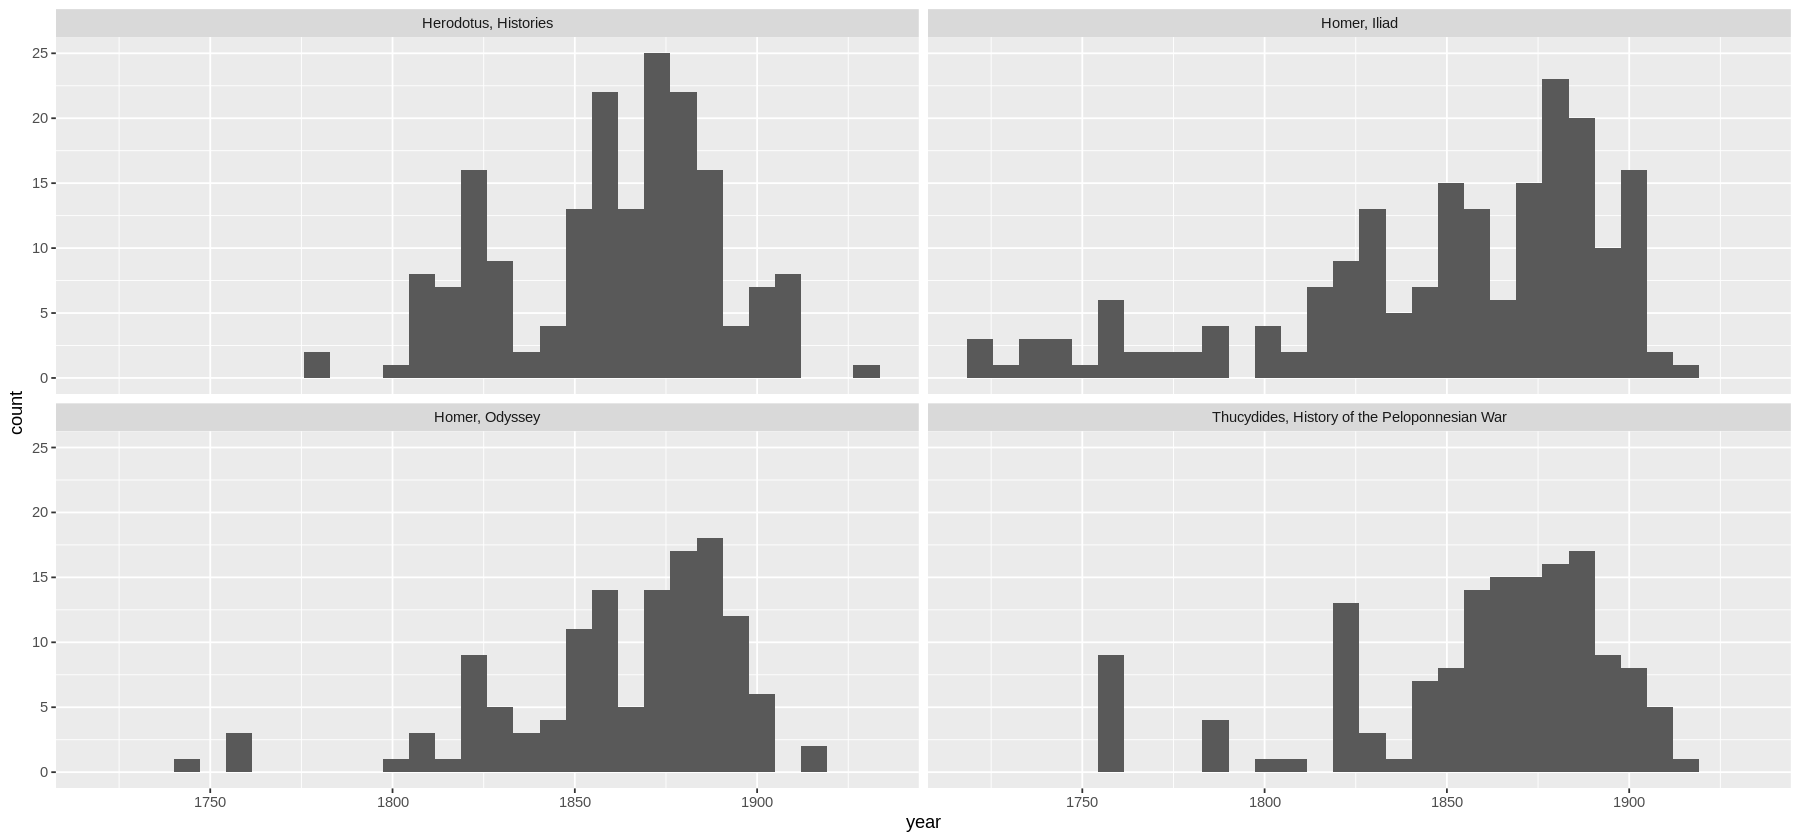

In [18]:
options(repr.plot.width=15)
meta.cites |> filter(is.edition & str_detect(work, "tlg(0003|0016|0012)\\.tlg00[12]")) |>
  ggplot(aes(year)) + geom_histogram() + facet_wrap(vars(work.label))

We now look at the citations of those four works _not_ in books that are editions of those works. They all seem to peak in the later 19c, except for Herodotus, which peaks around 1840.

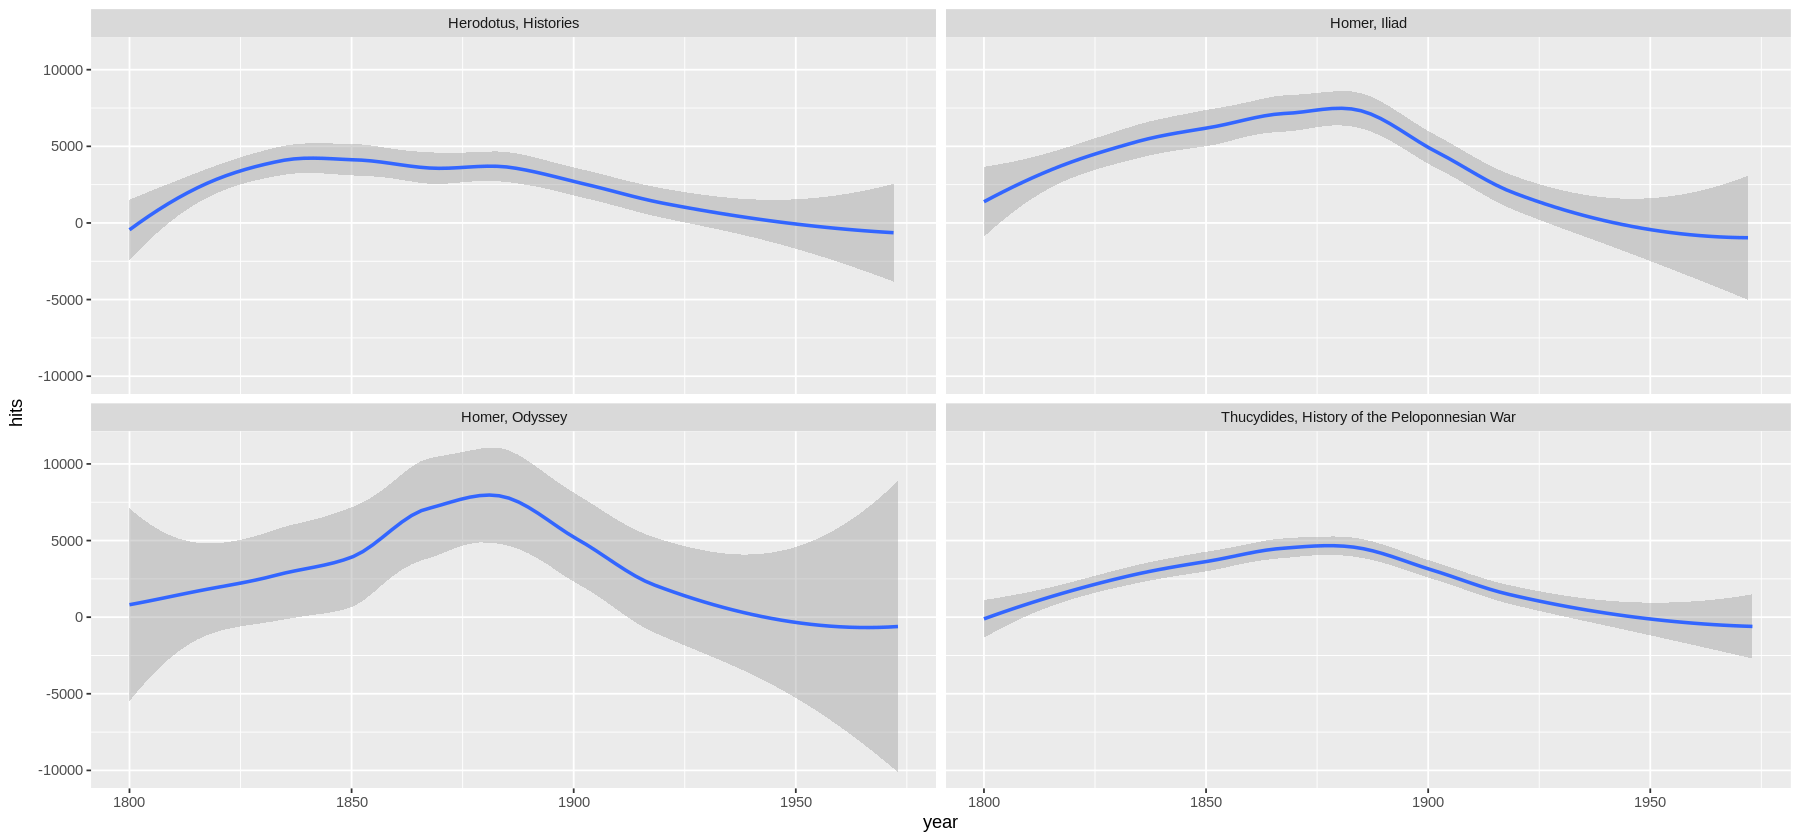

In [19]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  group_by(year, work, work.label) |> summarize(hits=sum(hits), .groups="drop") |>
  ggplot(aes(year, hits)) + geom_smooth(method="loess", formula=y ~ x) + facet_wrap(vars(work.label))

But are we counting citations the right way? There are just a lot more books in the late 19c, before the copyright cliff. (This plot also shows some outliers that we could use to clean up the IDI metadata.)

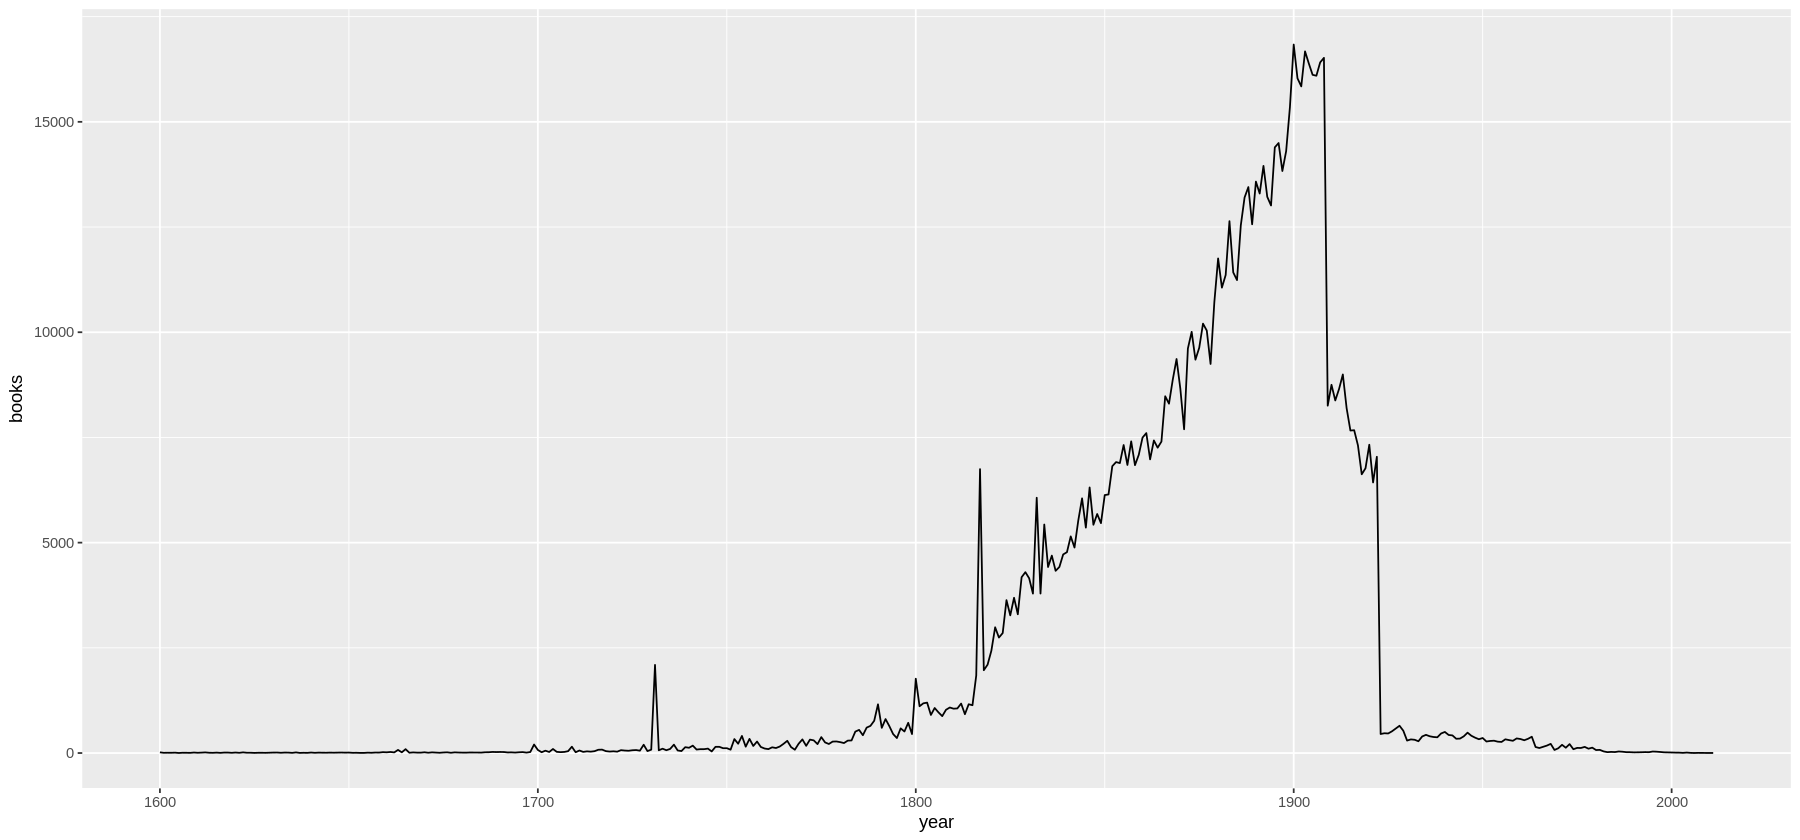

In [20]:
year.books <- idi.dated |> group_by(year) |> summarize(books=n())

year.books |> filter(year >= 1600) |>
  ggplot(aes(year, books)) + geom_line()

If we normalize number of citations by the number of books published in that year, we see that the rates of citation of these works are consistently _falling_ in the later 19c.

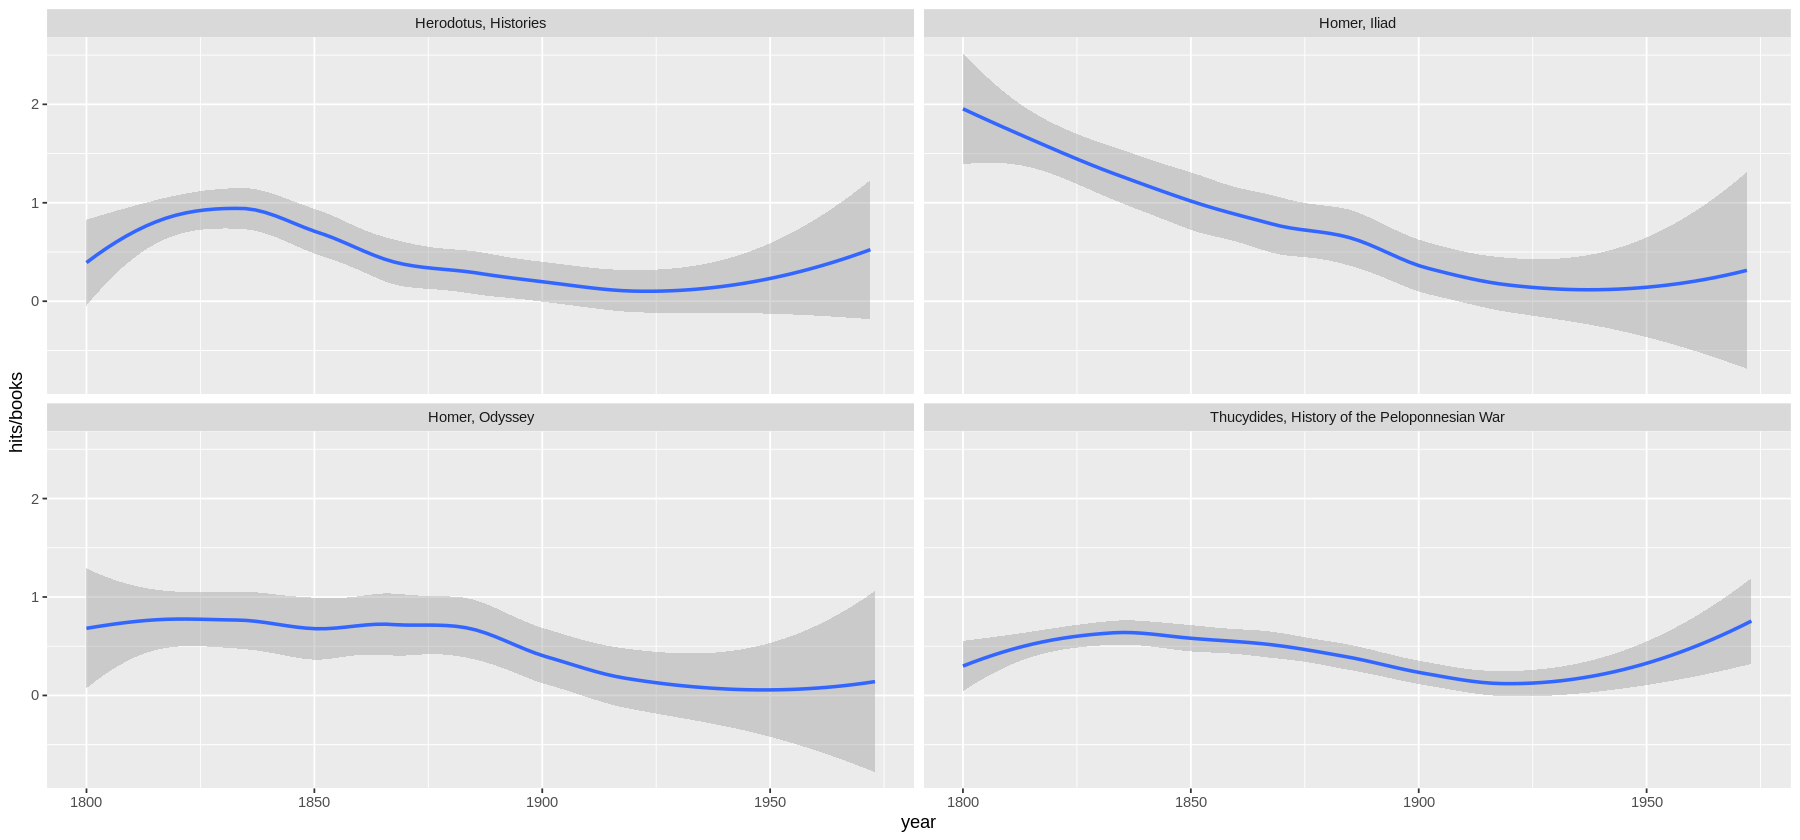

In [21]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  group_by(year, work, work.label) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth(method="loess", formula=y ~ x) + facet_wrap(vars(work.label))

But is it really fair to judge the popularity of Homer by the number of _total_ books? Rather than using book-level metadata, or just the top-level LC classifications we get in IDI, what if we used the presence of Greek and Latin quotations as a proxy for "books that might have mentioned Homer"? We plot the books with quotations, including editions, on top of the total number of books.

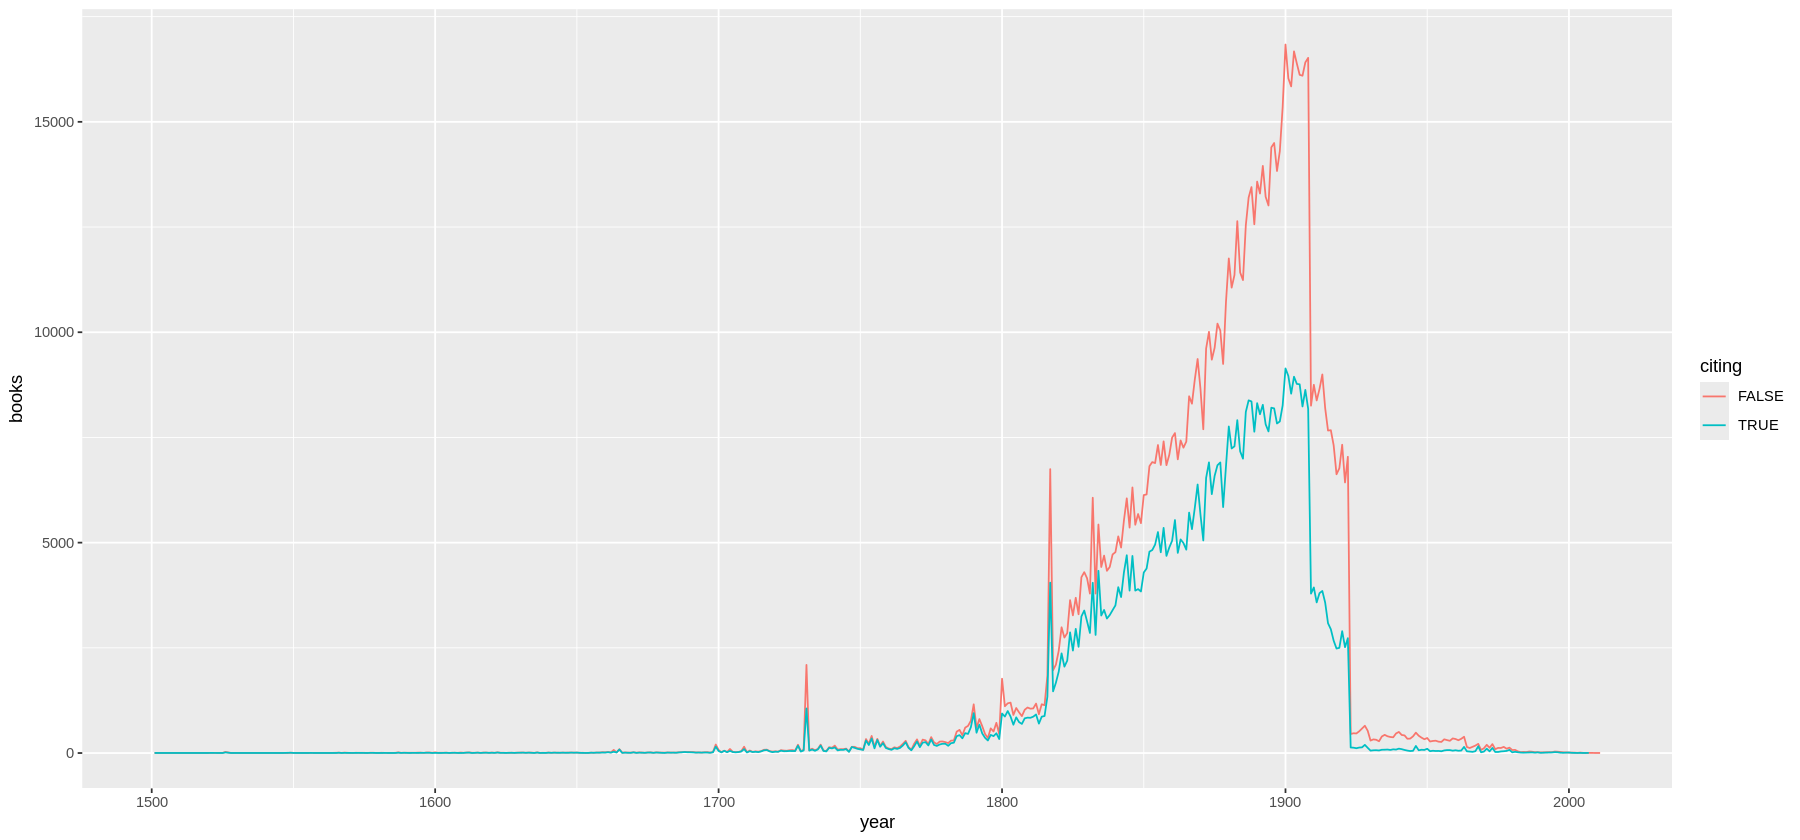

In [22]:
year.cite.books <- meta.cites |> select(year, book) |> distinct() |> group_by(year) |> summarize(books=n())

rbind(year.cite.books %>% mutate(citing=TRUE),
      year.books %>% mutate(citing=FALSE)) |> filter(year >= 1500) |>
  ggplot(aes(year, books, color=citing)) + geom_line()

When we normalize citations by the subset of books, we can see a more decided uptick in interest in Herodotus and Thucydides in the late 19c and early 20c.

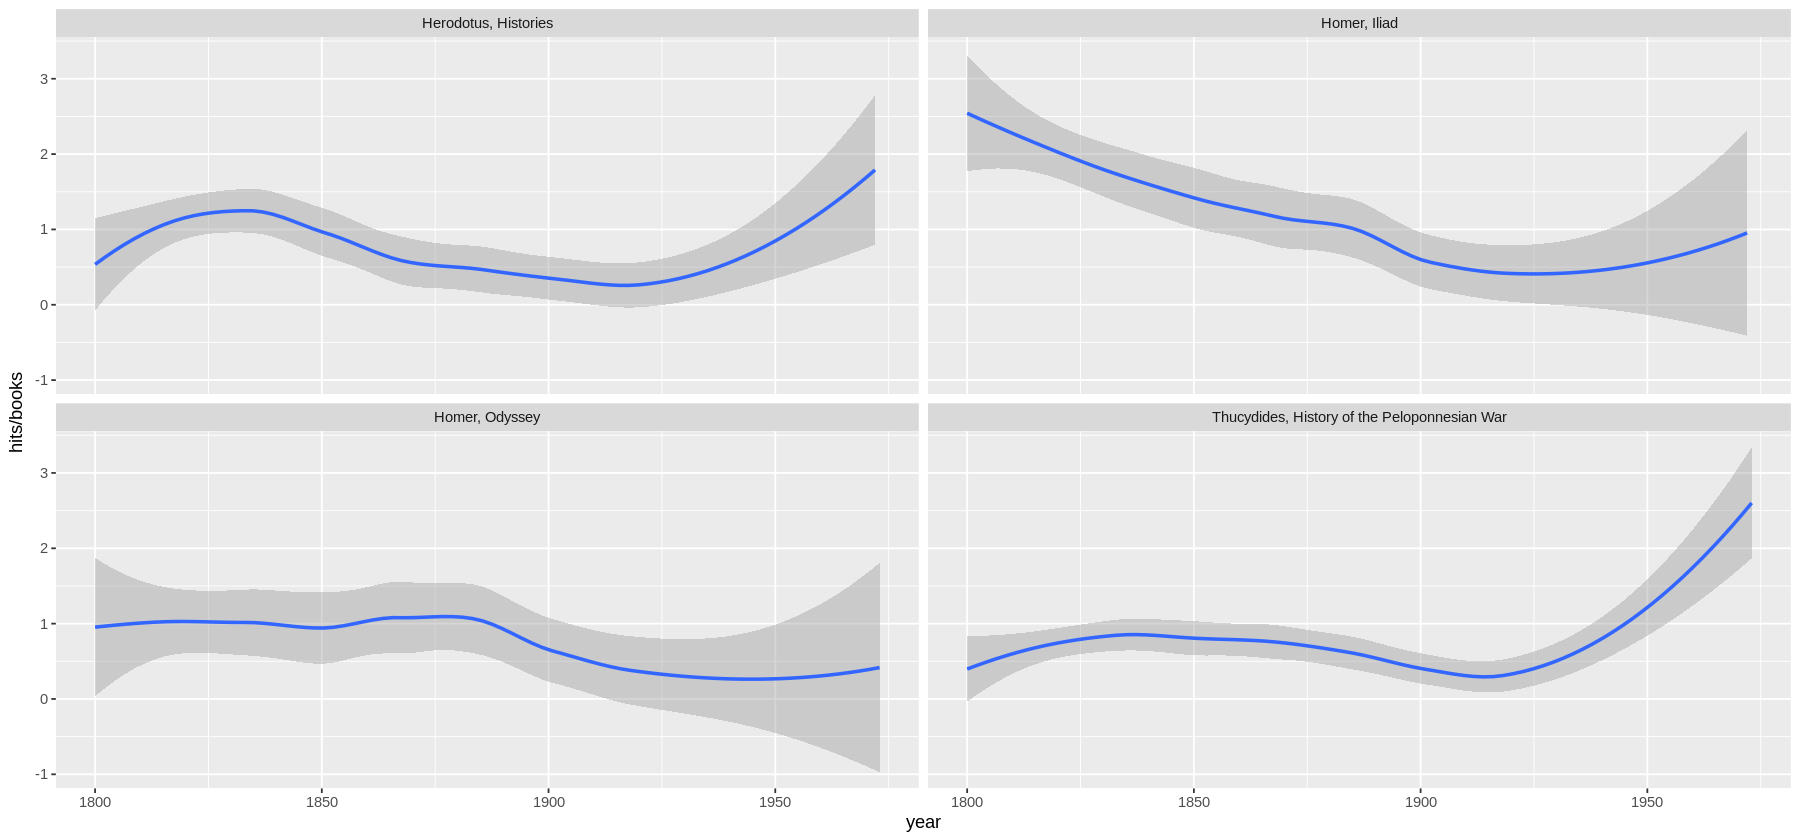

In [23]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  group_by(year, work, work.label) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.cite.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth(method="loess", formula=y ~ x) + facet_wrap(vars(work.label))

If we plot these by the IDI-detected language of these books, we can get a rough idea of the decline of scholarship in Latin.

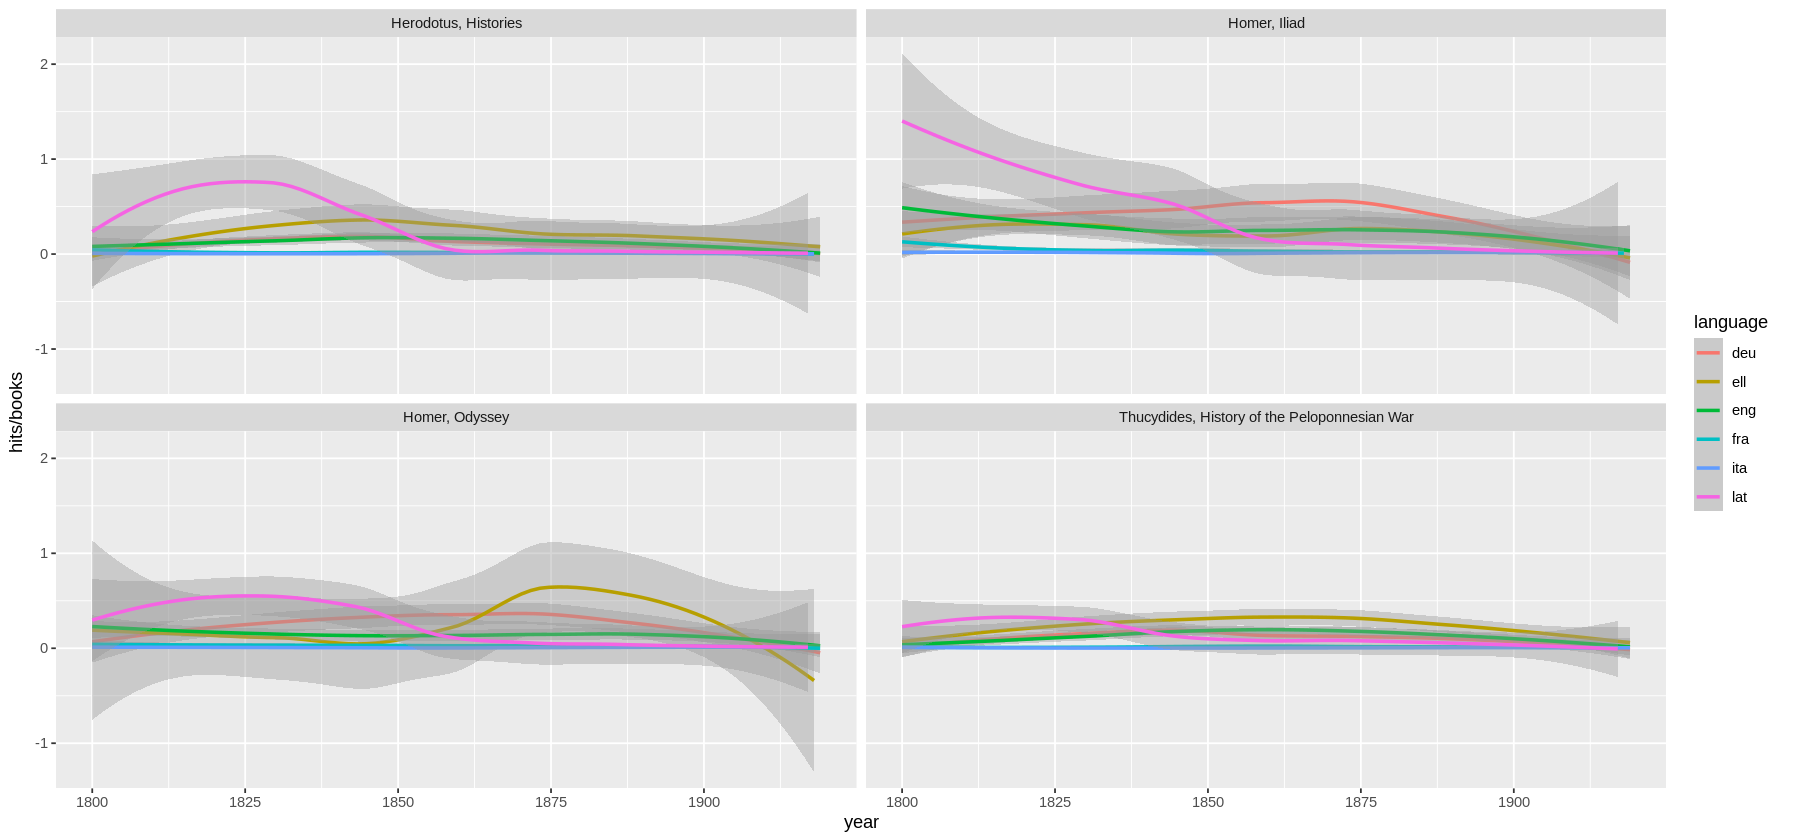

In [24]:
meta.cites |>
  filter(year >= 1800 & year < 1920) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  filter(language %in% alist(ell, lat, deu, eng, fra, ita)) |>
  group_by(year, work, work.label, language) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.cite.books, by="year") |>
  ggplot(aes(year, hits/books, color=language)) + geom_smooth(method="loess", formula=y ~ x) + facet_wrap(vars(work.label))

We look at the top 20 quoted works in different time periods, viz. before 1800:

In [25]:
meta.cites |> filter(!is.edition & language == "eng" & year < 1800) |>
  group_by(work, work.label) |> summarize(hits=sum(hits), .groups="drop") |> top_n(20) |> arrange(-hits)

Selecting by hits


work,work.label,hits
<chr>,<chr>,<int>
urn:cts:latinLit:phi0690.phi003,"Virgil, Aeneid",15572
urn:cts:latinLit:phi0914.phi001,"Titus Livius (Livy), Ab urbe condita",10078
urn:cts:latinLit:phi0893.phi001,"Horace, Odes",8191
urn:cts:latinLit:phi0959.phi006,"Ovid, Metamorphoses",6641
urn:cts:latinLit:phi0978.phi001,"Pliny, the Elder, Naturalis Historia",6377
urn:cts:latinLit:phi1276.phi001,"Juvenal, Saturae",6159
urn:cts:latinLit:phi0690.phi002,"Virgil, Georgics",5751
urn:cts:latinLit:phi0893.phi004,"Horace, Satires",4751
urn:cts:greekLit:tlg0012.tlg001,"Homer, Iliad",4619


from 1800 to 1850:

In [26]:
meta.cites |> filter(!is.edition & language == "eng" & year >= 1800 & year < 1850) |>
  group_by(work, work.label) |> summarize(hits=sum(hits), .groups="drop") |> top_n(20) |> arrange(-hits)

Selecting by hits


work,work.label,hits
<chr>,<chr>,<int>
urn:cts:latinLit:phi0690.phi003,"Virgil, Aeneid",134596
urn:cts:latinLit:phi0914.phi001,"Titus Livius (Livy), Ab urbe condita",126852
urn:cts:latinLit:phi0978.phi001,"Pliny, the Elder, Naturalis Historia",69945
urn:cts:latinLit:phi0959.phi006,"Ovid, Metamorphoses",63474
urn:cts:latinLit:phi0893.phi001,"Horace, Odes",62872
urn:cts:latinLit:phi1276.phi001,"Juvenal, Saturae",47909
urn:cts:latinLit:phi1002.phi001,"Quintilian, Institutio Oratoria",44367
urn:cts:latinLit:phi0690.phi002,"Virgil, Georgics",42284
urn:cts:latinLit:phi0474.phi056,"Cicero, Marcus Tullius, Letters to his Friends",40672


and from 1850 to 1900.

In [27]:
meta.cites |> filter(!is.edition & language == "eng" & year >= 1850 & year < 1900) |>
  group_by(work, work.label) |> summarize(hits=sum(hits), .groups="drop") |> top_n(20) |> arrange(-hits)

Selecting by hits


work,work.label,hits
<chr>,<chr>,<int>
urn:cts:latinLit:phi0914.phi001,"Titus Livius (Livy), Ab urbe condita",274225
urn:cts:latinLit:phi0690.phi003,"Virgil, Aeneid",198504
urn:cts:latinLit:phi0893.phi001,"Horace, Odes",95021
urn:cts:latinLit:phi0978.phi001,"Pliny, the Elder, Naturalis Historia",94127
urn:cts:latinLit:phi0448.phi001,"Julius Caesar, Gallic War",90848
urn:cts:latinLit:phi0550.phi001,"Lucretius, De Rerum Natura",82882
urn:cts:latinLit:phi0959.phi006,"Ovid, Metamorphoses",82583
urn:cts:greekLit:tlg0012.tlg001,"Homer, Iliad",79278
urn:cts:latinLit:phi1002.phi001,"Quintilian, Institutio Oratoria",70378


In [28]:
seq <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/seq.csv.gz")))),
  header=TRUE)

We'll plot the data from Thucydides, binned by 50-year periods.

In [29]:
thuc <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/locs/urn%3Acts%3AgreekLit%3Atlg0003.tlg001.csv.gz")))),
  header=TRUE)

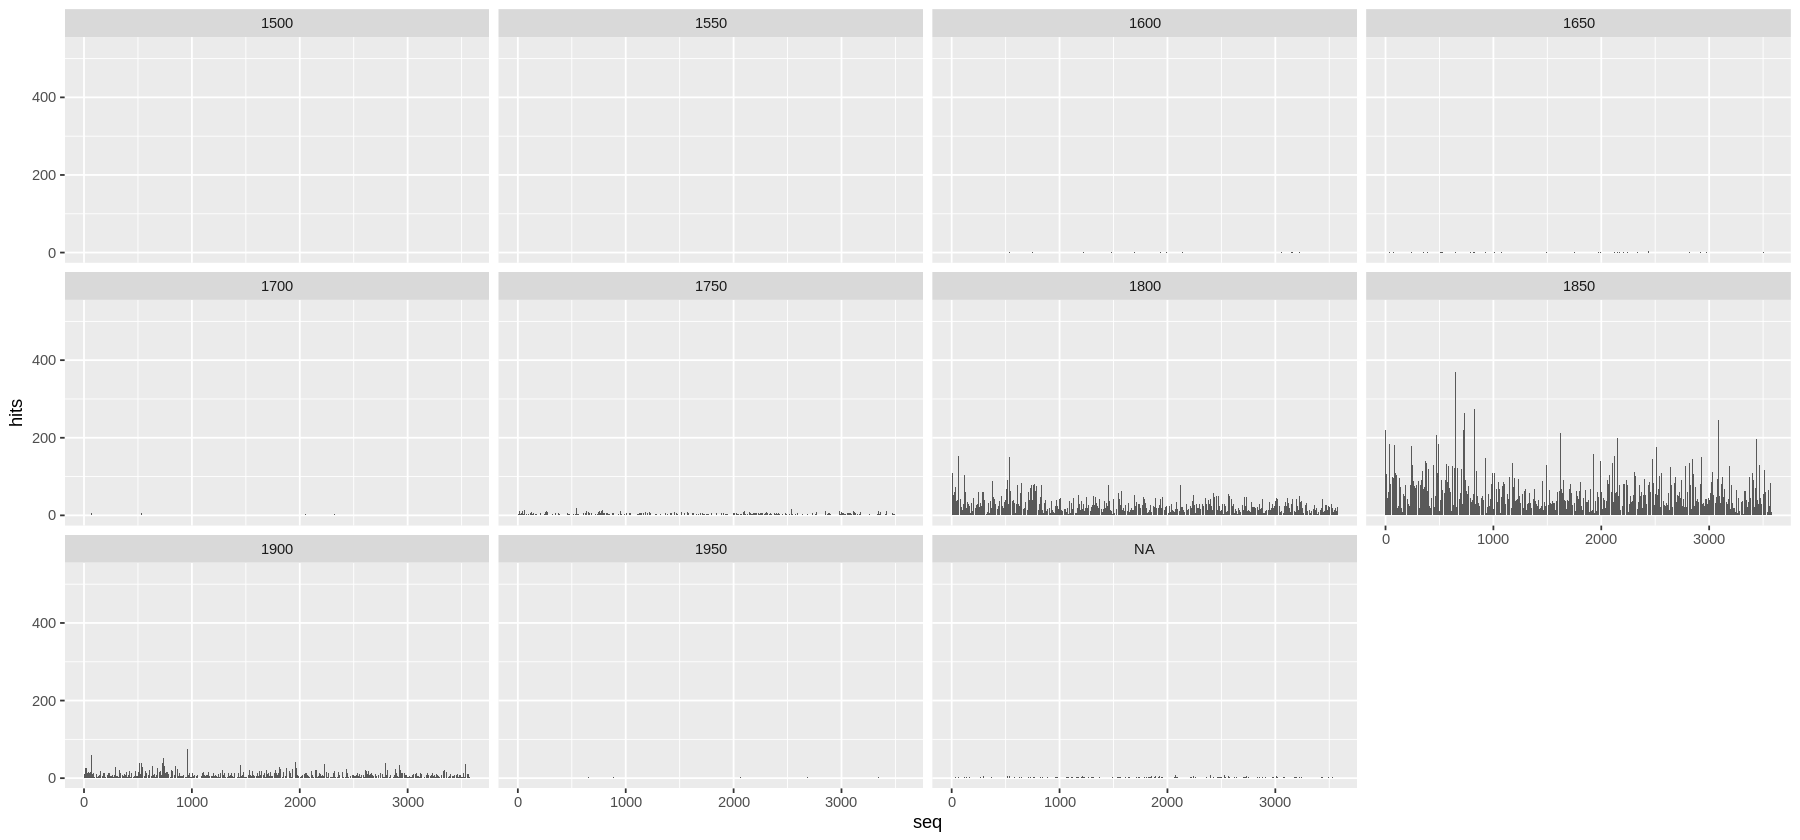

In [30]:
thuc |> inner_join(select(idi.dated, book, year, language=language_gen), by="book") |>
  anti_join(select(thuc.eds, book), by="book") |>
  mutate(bin=as.integer(year/50)*50) |>
  group_by(seq, bin) |> summarize(hits=sum(hits), .groups="drop") |>
  ggplot(aes(seq, hits)) + geom_col() + facet_wrap(vars(bin))

We join with the `seq` table to get the readable citations and see which ones are most quoted.

In [31]:
thuc |> inner_join(select(idi.dated, book, year, language=language_gen), by="book") |>
  anti_join(select(thuc.eds, book), by="book") |>
  inner_join(filter(seq, startsWith(loc, "urn:cts:greekLit:tlg0003.tlg001")), by="seq") |>
  group_by(loc) |> summarize(hits=sum(hits), .groups="drop") |> arrange(-hits)

loc,hits
<chr>,<int>
urn:cts:greekLit:tlg0003.tlg001:1.126.11,875
urn:cts:greekLit:tlg0003.tlg001:1.6.3,689
urn:cts:greekLit:tlg0003.tlg001:1.22.4,637
urn:cts:greekLit:tlg0003.tlg001:8.68.1,589
urn:cts:greekLit:tlg0003.tlg001:1.138.3,568
urn:cts:greekLit:tlg0003.tlg001:1.4.1,566
urn:cts:greekLit:tlg0003.tlg001:2.15.4,559
urn:cts:greekLit:tlg0003.tlg001:1.90.3,552
urn:cts:greekLit:tlg0003.tlg001:5.16.1,541


We now look at total classics publication.

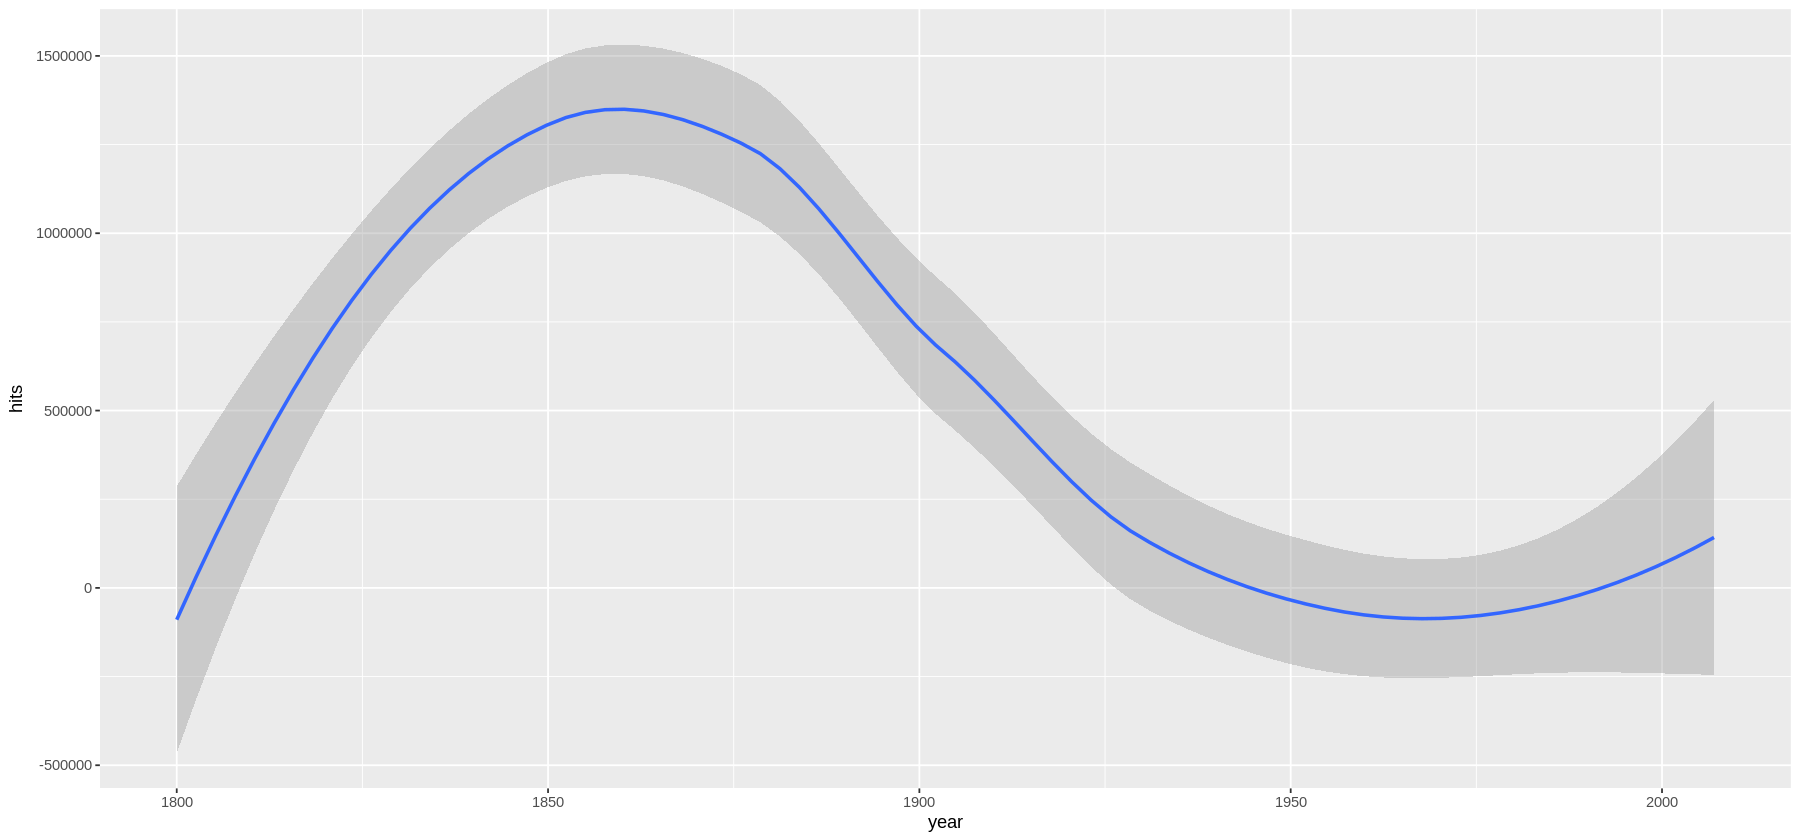

In [32]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition) |>
  group_by(year) |> summarize(hits=sum(hits), .groups="drop") |>
  ggplot(aes(year, hits)) + geom_smooth(method="loess", formula=y ~ x)

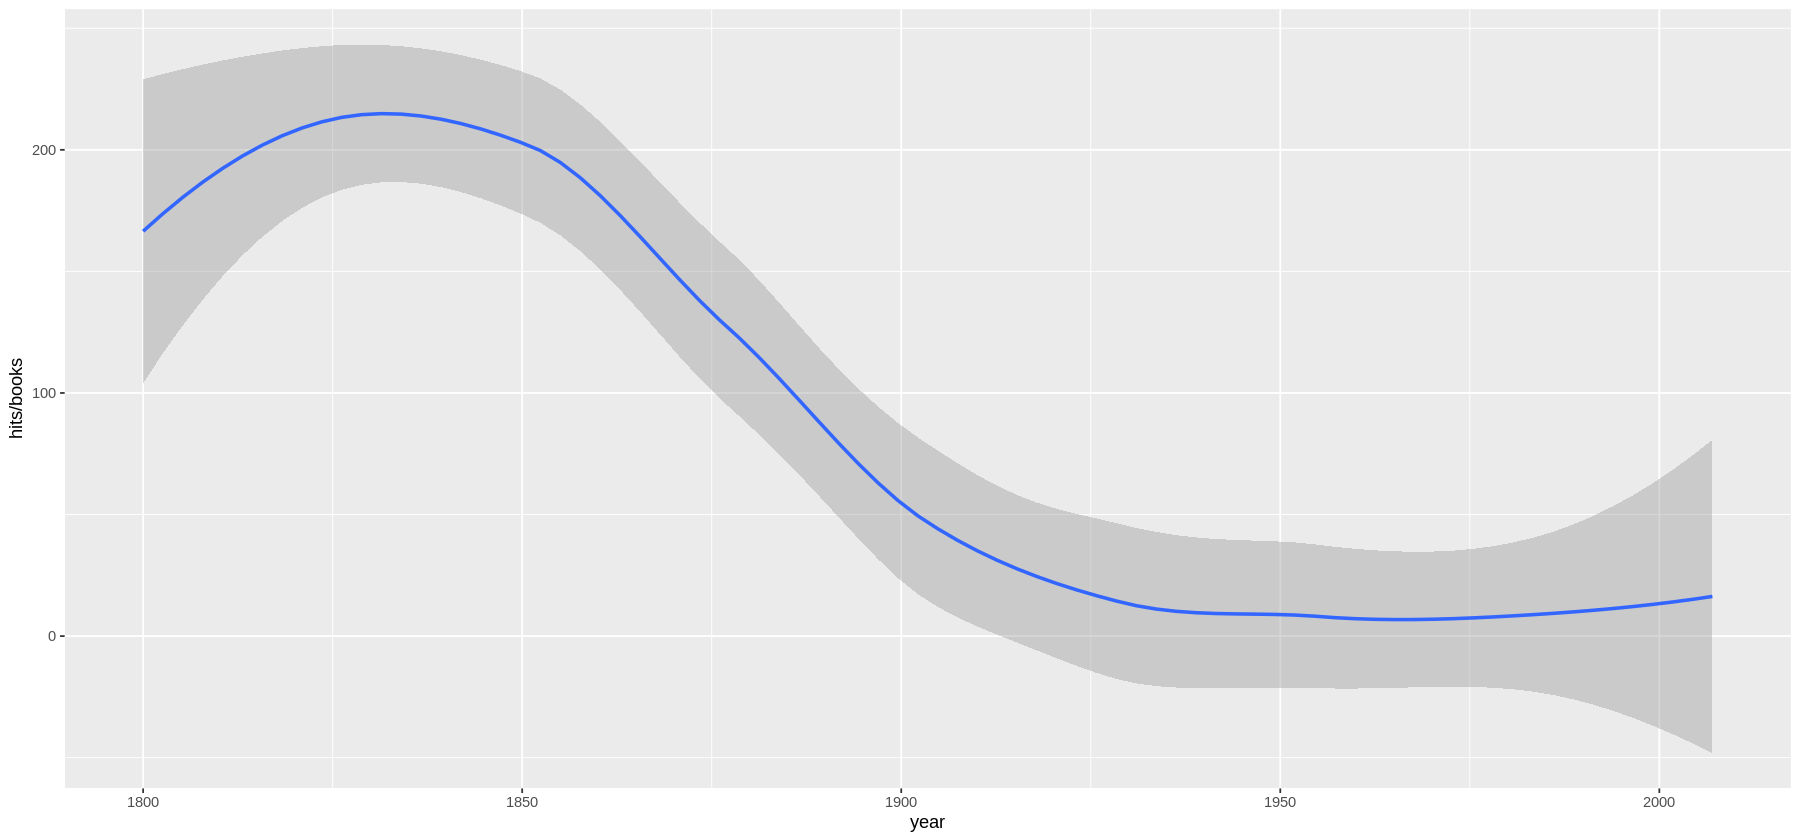

In [33]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition) |>
  group_by(year) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth(method="loess", formula=y ~ x)

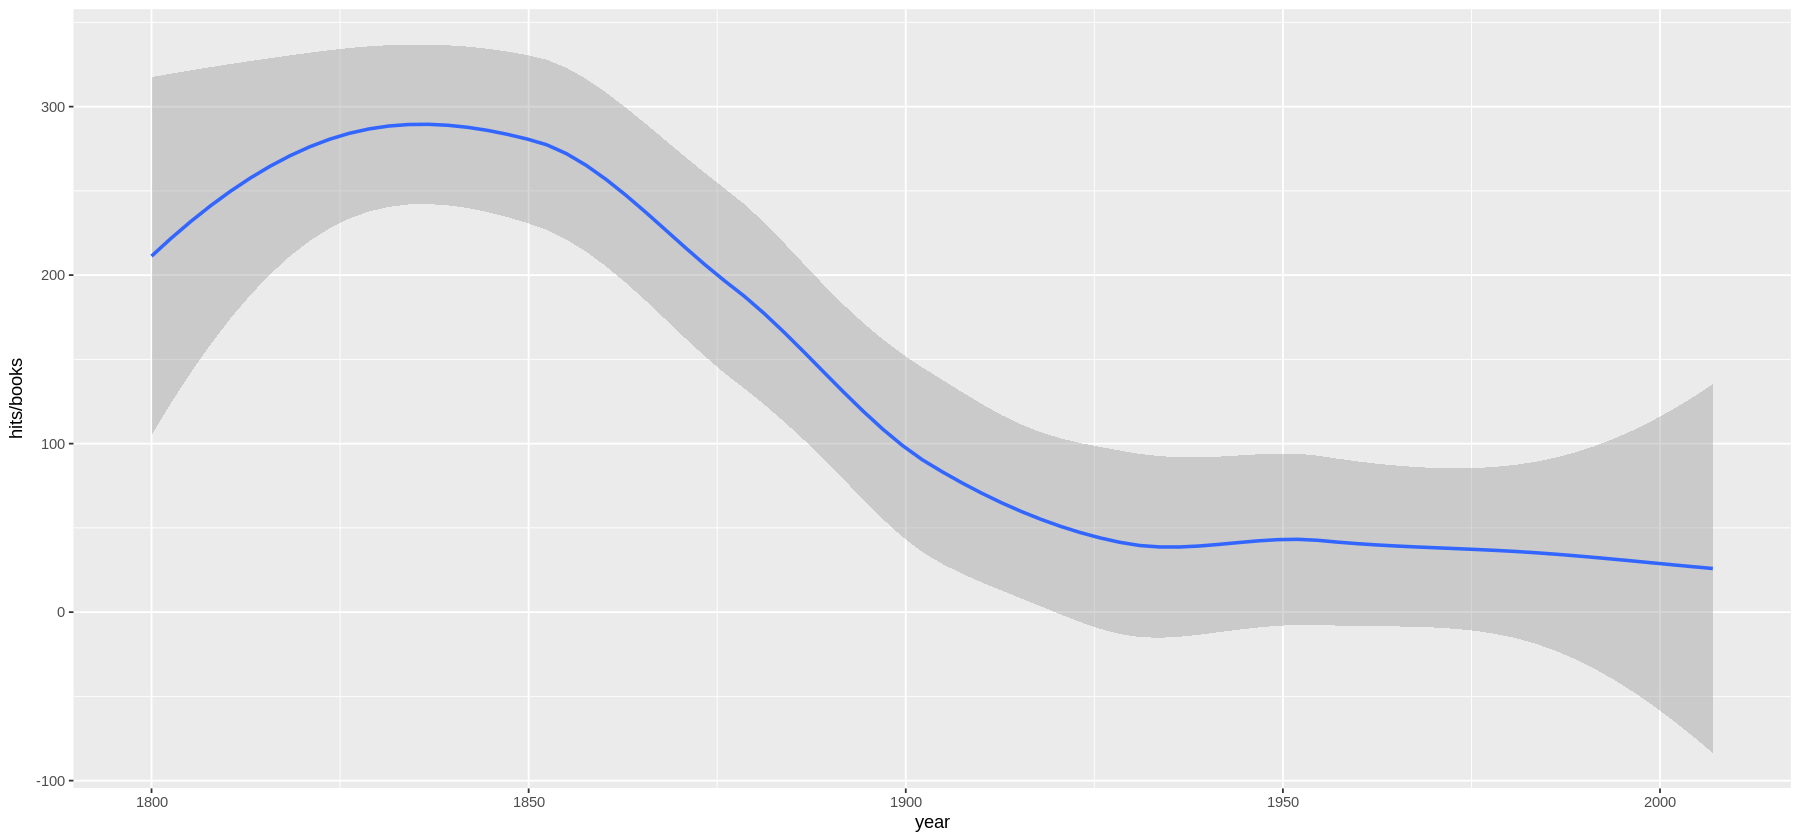

In [34]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition) |>
  group_by(year) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.cite.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth(method="loess", formula=y ~ x)

Editions as a proportion of books

In [35]:
meta.cites |>
  filter(year >= 1600) |>
  filter(is.edition) |>
  select(book, year) |> distinct() |>
  group_by(year) |> summarize(editions=n(), .groups="drop") |>
  arrange(-editions)

year,editions
<int>,<int>
1857,314
1844,281
1828,208
1829,194
1875,193
1877,191
1881,184
1898,180
1869,176


Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_smooth()`).”


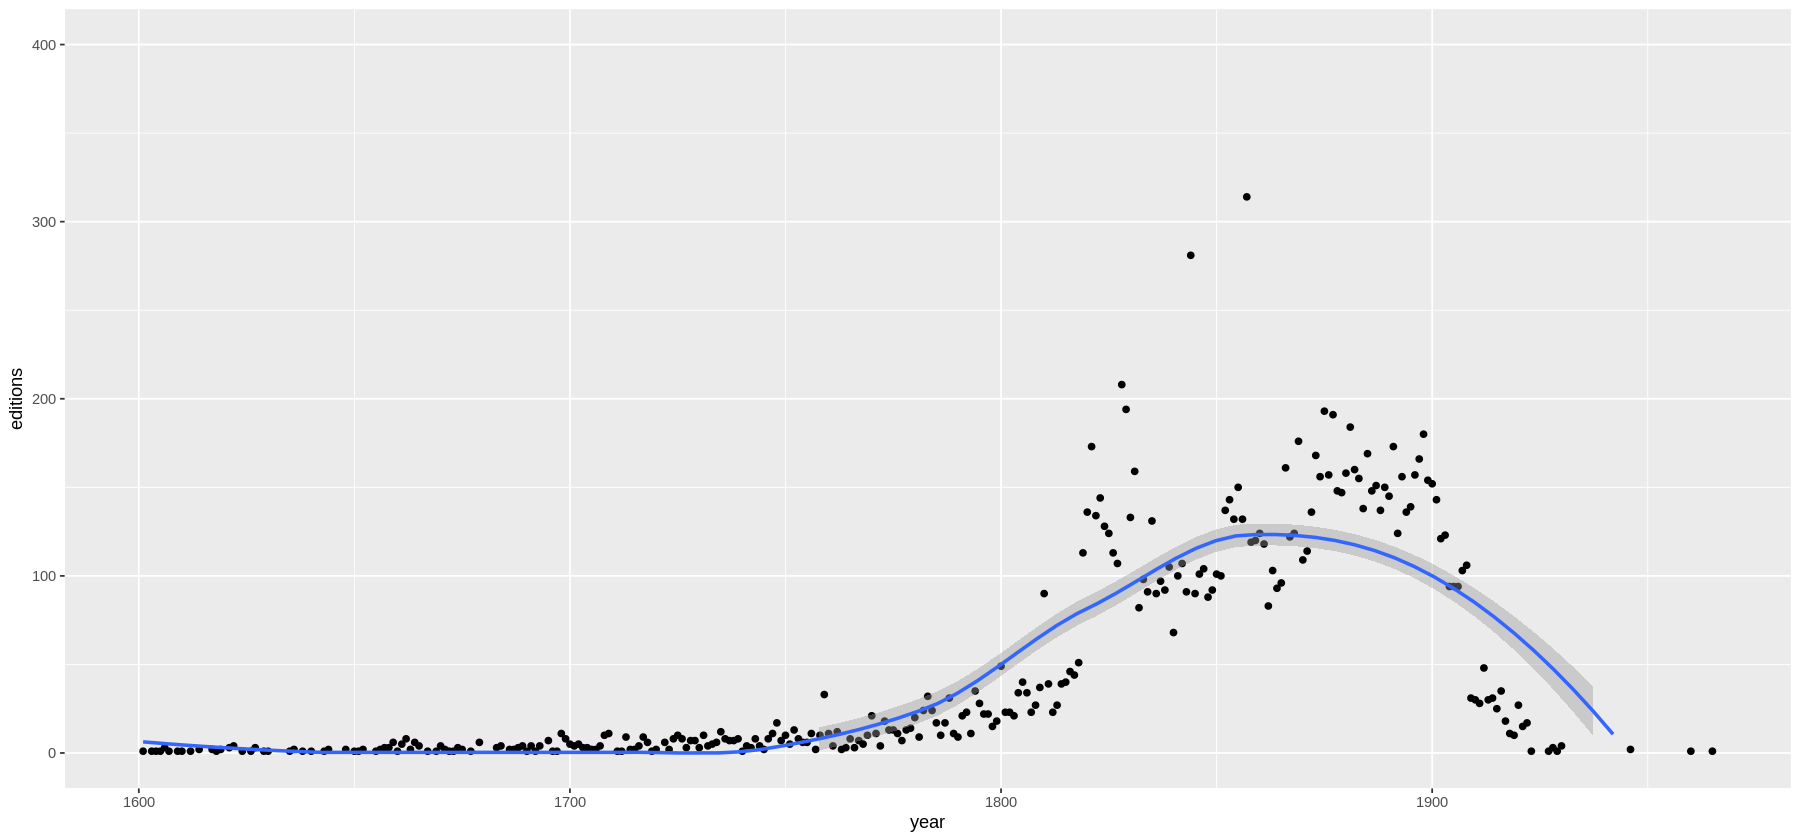

In [36]:
meta.cites |>
  filter(year >= 1600) |>
  filter(is.edition) |>
  select(book, year) |> distinct() |>
  group_by(year) |> summarize(editions=n(), .groups="drop") |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, editions)) + geom_point() + geom_smooth(method="loess", formula=y ~ x) + scale_y_continuous(limits=c(0,400))

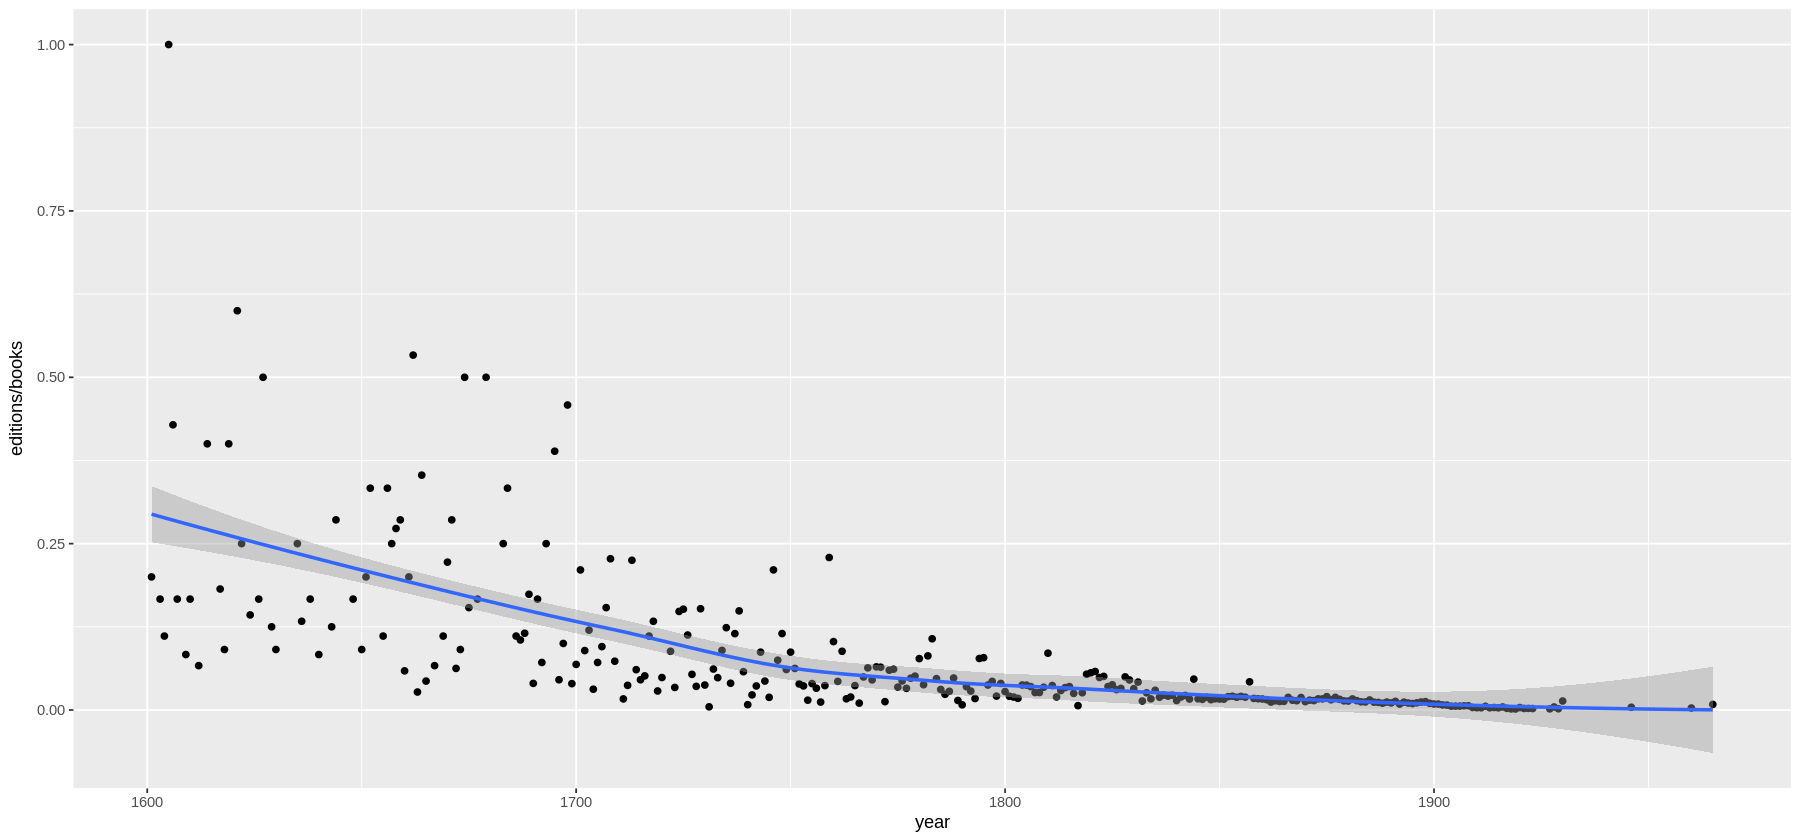

In [37]:
meta.cites |>
  filter(year >= 1600) |>
  filter(is.edition) |>
  select(book, year) |> distinct() |>
  group_by(year) |> summarize(editions=n(), .groups="drop") |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, editions/books)) + geom_point() + geom_smooth(method="loess", formula=y ~ x)# + scale_y_continuous(limits=c(0,1))

Investigate outliers.

In [38]:
meta.cites |>
  filter(year >= 1700) |>
  filter(is.edition) |>
  select(year, book) |> distinct() |>
  group_by(year) |> summarize(editions=n(), .groups="drop") |>
  inner_join(year.books, by="year") |>
  mutate(prop=editions/books) |>
  arrange(-prop)

year,editions,books,prop
<int>,<int>,<int>,<dbl>
1759,33,144,0.22916667
1708,10,44,0.22727273
1713,9,40,0.22500000
1701,4,19,0.21052632
1746,8,38,0.21052632
1707,4,26,0.15384615
1729,7,46,0.15217391
1725,10,66,0.15151515
1738,7,47,0.14893617


In [39]:
idi.dated |> filter(year == 1713)

book,title,author,date1_src,date2_src,date_types_src,language_src,language_gen,ocr_score_src,ocr_score_gen,year,year2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
32044105319867,Journal literaire.,,1713,uuuu,Continuing resource status unknown,fra,fra,92,78,1713,NA
32044105319875,Journal literaire.,,1713,uuuu,Continuing resource status unknown,fra,fra,91,72,1713,NA
AH631S,"The penitent pardon'd ; or, A discourse of the nature of sin, and the efficacy of repentance, under the parable of the prodigal son","Goodman, John",1713,,Single known date/probable date,eng,eng,93,98,1713,NA
HN79SM,Operum,Ovid,1713,,Single known date/probable date,lat,lat,92,87,1713,NA
HN79SN,Operum,Ovid,1713,,Single known date/probable date,lat,lat,93,87,1713,NA
HXGF81,"Statuts et privileges de la noblesse de la basse Alsace accordes par les anciens empereurs, confirmes et augmentes par le roy = E. frey ohnmittelbaren Ritterschafft im untern Elsass adeliche Ritter-Ordnung und theils kayserliche theils königliche ertheilte, confirmirte und erweiterte privilegia und rescripta.",Holy Roman Empire.,1713,,Single known date/probable date,fra,deu,89,61,1713,NA
32044020446340,"Unum necessarium, scire, quid sibi sit necessarium in vita et morte et post mortem, quod non-necessariis mundi fatigatus et ad unum necessarium sese recipiens,","Comenius, Johann Amos",1713,,Single known date/probable date,lat,lat,91,82,1713,NA
RSMD26,"L'école parfaite des officiers de bouche : qui enseigne les devoirs du maître d'hôtel & du sommelier, la maniere de faire les confitures séches & liquides, les liqueurs, les eaux les pommades & les parfums; la cuisine, à découper les viandes, & à faire la patisserie.",,1713,,Single known date/probable date,fra,fra,94,80,1713,NA
32044086920493,The wife of Bath. A comedy.,"Gay, John",1713,,Single known date/probable date,eng,eng,47,97,1713,NA


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


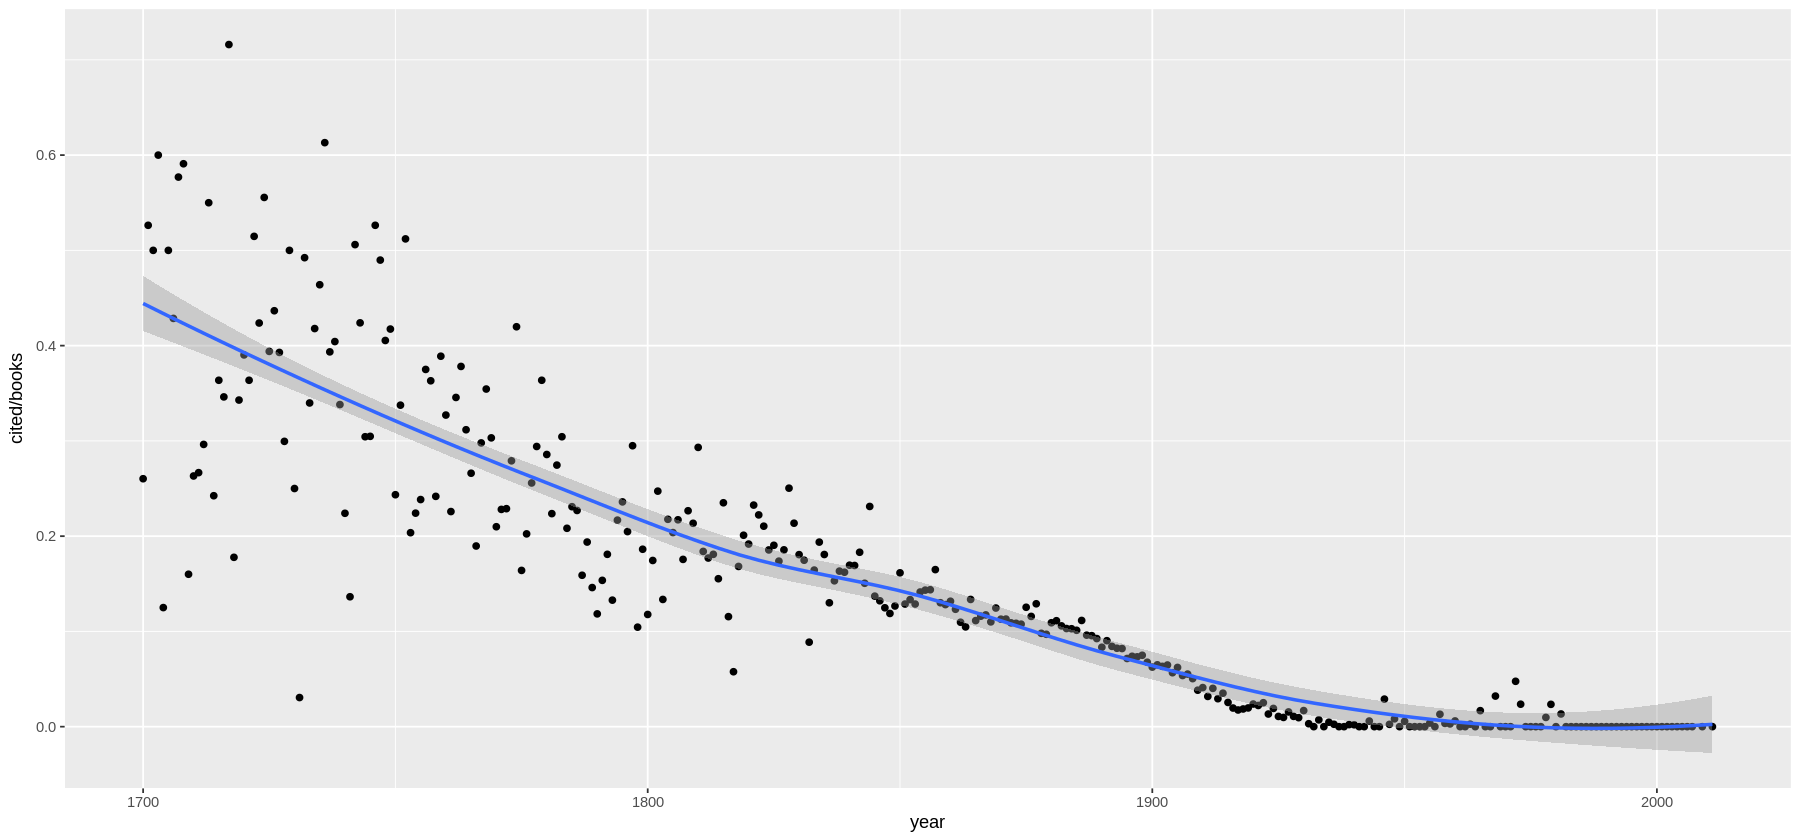

In [40]:
year.books |>
  left_join(meta.cites |> filter(hits >= 10) |> select(year, book) |> distinct() |> group_by(year) |> summarize(cited=n()), by="year") |>
  mutate(cited=if_else(is.na(cited), 0, cited)) |>
  filter(year >= 1700) |>
  ggplot(aes(year, cited/books)) + geom_point() + geom_smooth()

In [41]:
meta.cites |> filter(is.edition) |> count()
meta.cites |> filter(is.edition) |> filter(str_detect(author, fixed(work.author)) | str_detect(title, fixed(work.author))) |> count()
meta.cites |> filter(is.edition) |> filter(str_detect(title, fixed(work.title))) |> count()

  #(str_detect(author, fixed(work.author)) | str_detect(work.author, fixed(author))))

n
<int>
47935


n
<int>
24487


n
<int>
1830


In [42]:
22272/54819

[1] 0.4062825

In [43]:
meta.cites |> filter(is.edition) |>
  rowwise() |> mutate(adist=agrepl(work.author, author), tdist=agrepl(work.author, title)) |>
  ungroup() |> filter(adist | tdist) |> count()

meta.cites |> filter(is.edition) |>
  rowwise() |> mutate(dist=agrepl(work.title, title, max.distance = 0.1)) |>
  ungroup() |> filter(dist) |> count()

n
<int>
25801


n
<int>
3719


In [44]:
overlap |> filter(cover > 0.9 & wover < 0.2) |> mutate(book=tolower(book)) |> arrange(-cover)

edition,book,lcslen,lblcs,wlcs,tlen,nlocs,cover,overlap,wover
<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
urn:cts:greekLit:tlg0007.tlg103.perseus-grc2,32044094025285,10,3564.5,3564.5,17824,10,1,1.0000000,0.1999832
urn:cts:greekLit:tlg4102.tlg042.1st1K-grc1,ah5hek,5,8072.0,8072.0,40416,5,1,1.0000000,0.1997229
urn:cts:latinLit:stoa0121g.stoa004.opp-lat1,hnhban,15,16680.0,38669.0,194899,31,1,0.4838710,0.1984053
urn:cts:greekLit:tlg1271.tlg003.1st1K-grc1,32044122922180,3,742.0,742.0,3743,3,1,1.0000000,0.1982367
urn:cts:greekLit:tlg4170.tlg001a.1st1K-grc1,32044054100201,2,235.0,830.0,4209,2,1,1.0000000,0.1971965
urn:cts:latinLit:phi2331.phi006.perseus-lat2,32044018767723,13,2485.5,3582.0,18232,14,1,0.9285714,0.1964677
urn:cts:latinLit:stoa0114a.stoa014.opp-lat1,32044073505281,2,971.0,971.0,5035,2,1,1.0000000,0.1928500
urn:cts:latinLit:stoa0275.stoa005.opp-lat1,hnta6m,7,4763.0,14859.0,77195,14,1,0.5000000,0.1924866
urn:cts:greekLit:tlg0086.tlg010.perseus-grc2,ah5als,115,72776.0,77189.0,406266,116,1,0.9913793,0.1899962


Analyze books with a lot of Greek that are not editions.

In [45]:
greek.words <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/greek-words.csv", header=TRUE)

In [46]:
overlap.10k <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/overlap-grc10k.csv", header=TRUE)

In [47]:
greek.book.overlap <- overlap.10k |>
  mutate(work=str_replace(edition, "\\.[^.]+$", "")) |>
  filter(str_detect(work, "greekLit")) |>
  group_by(book) |>
  summarize(urn=work[which.max(wover)], cover=max(cover), overlap=max(overlap), wover=max(wover), wlcs=sum(wlcs)) |>
  ungroup() |>
  left_join(works |> select(urn, work.author=author, work.title=title), by="urn")

In [48]:
greek.book.overlap |> filter(wover >= 0.1)

book,urn,cover,overlap,wover,wlcs,work.author,work.title
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
32044001262195,urn:cts:greekLit:tlg0031.tlg002,0.5235988,0.5176991,0.4548051,101964.00,New Testament,Gospel of Mark
32044002418820,urn:cts:greekLit:tlg0032.tlg006,0.9346494,0.9339687,0.8644936,379064.00,Xenophon,Anabasis
32044004330304,urn:cts:greekLit:tlg0013.tlg001,1.0000000,1.0000000,0.9641256,1503856.50,Homeric Hymns,Hymn 1 to Dionysus
32044004331278,urn:cts:greekLit:tlg0019.tlg009,0.9755284,0.9733037,0.8957147,61841.04,Aristophanes,Frogs
32044004333092,urn:cts:greekLit:tlg0085.tlg005,0.9763493,0.9763493,0.9272944,59740.50,Aeschylus,Agamemnon
32044004333100,urn:cts:greekLit:tlg0085.tlg005,0.9654336,0.9654336,0.9217938,59240.00,Aeschylus,Agamemnon
32044004335766,urn:cts:greekLit:tlg0059.tlg004,0.9354839,0.9354839,0.8890840,187838.00,Plato,Phaedo
32044004394003,urn:cts:greekLit:tlg0062.tlg066,0.8230088,0.8230088,0.7471422,64837.00,Lucian of Samosata,Dialogi mortuorum
32044004396222,urn:cts:greekLit:tlg0059.tlg023,1.0000000,1.0000000,0.9575716,188621.50,Plato,Gorgias


In [49]:
greek.words |> filter(wc >= 10000) |> count()

n
<int>
10540


In [50]:
greek.books <- greek.words |>
  mutate(words.per.line=wc/lc) |>
  left_join(greek.book.overlap, by="book") |>
  inner_join(idi.dated, by="book") |>
  mutate(wover=if_else(is.na(wover), 0, wover), cover=if_else(is.na(cover), 0, cover), wlcs=if_else(is.na(wlcs), 0, wlcs))


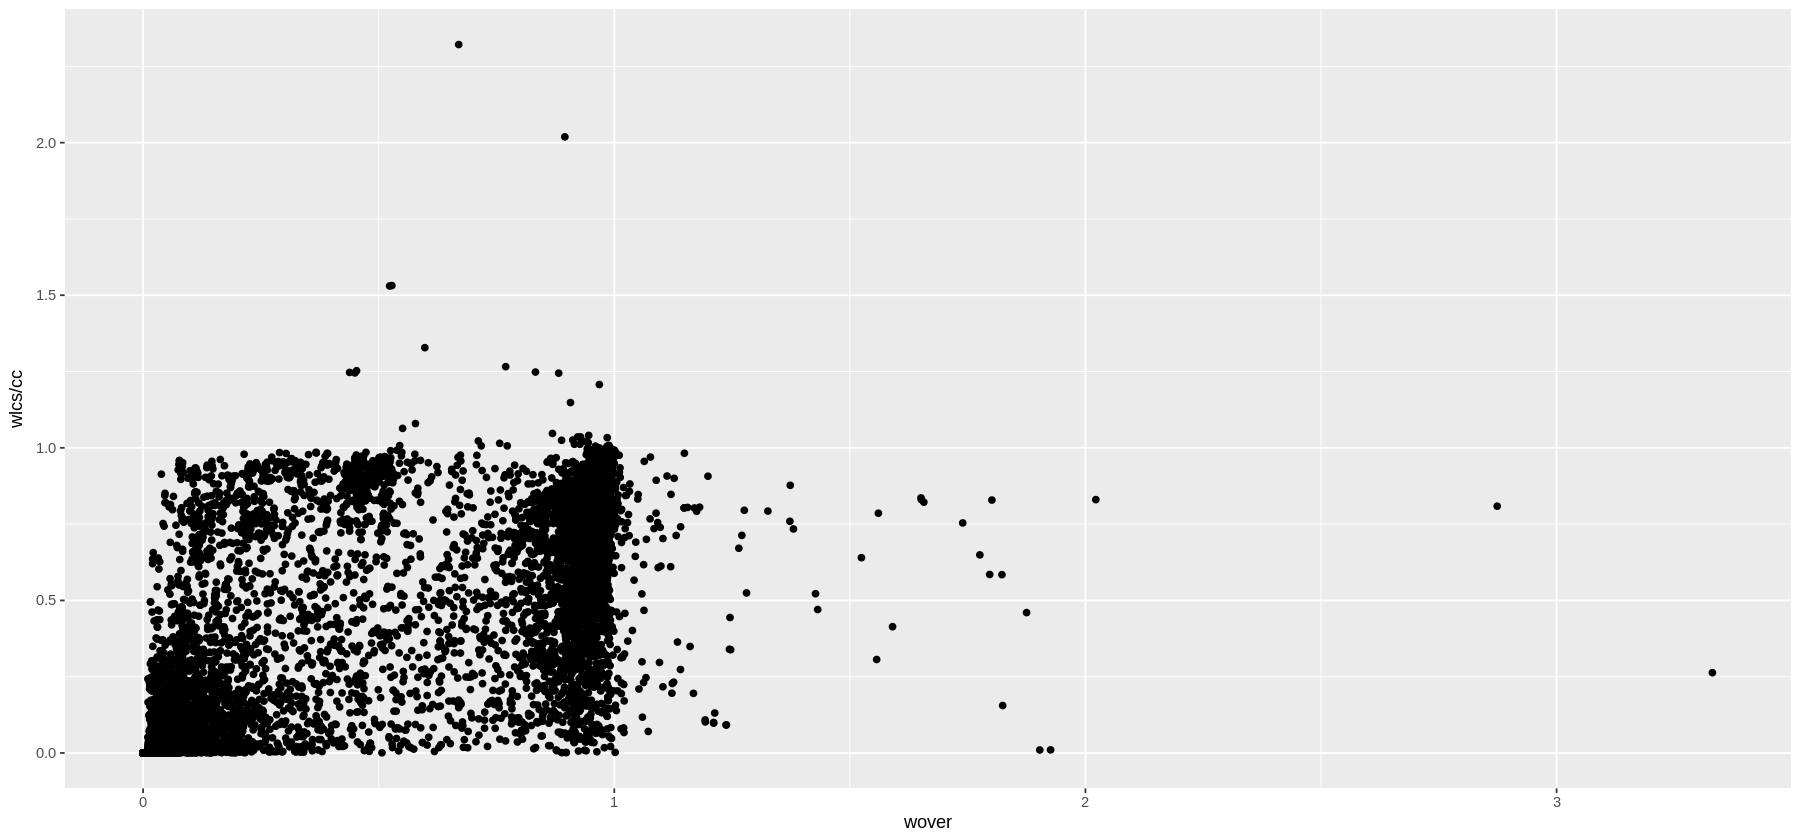

In [51]:
greek.books |> filter(wc >= 10000) |>
  ggplot(aes(wover, wlcs/cc)) + geom_point()

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


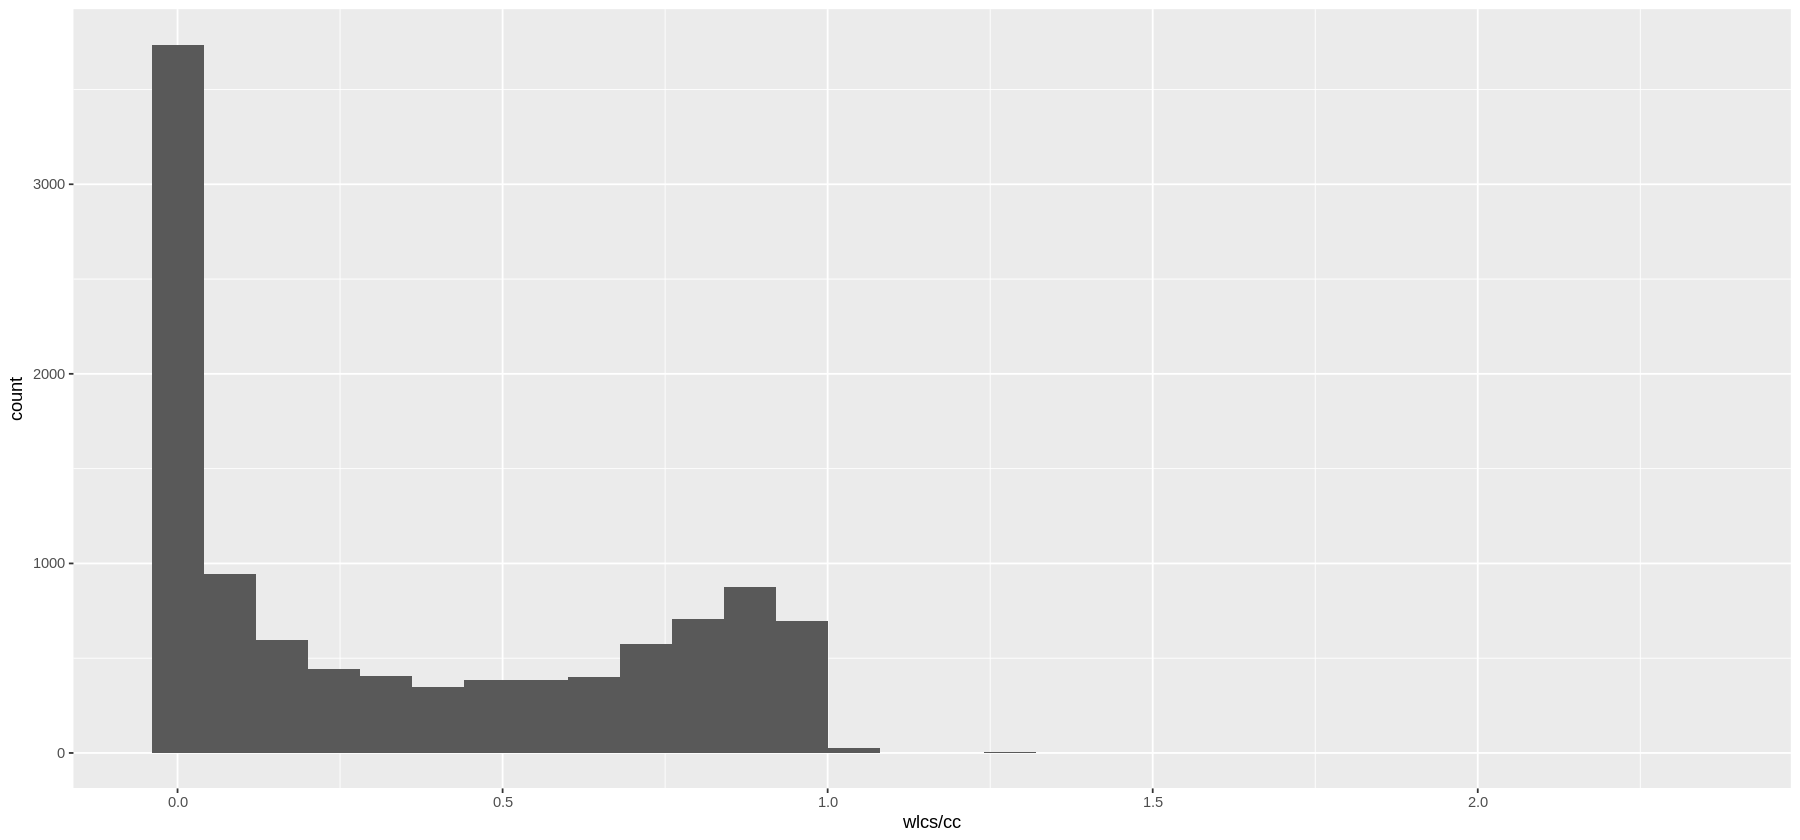

In [52]:
greek.books |> filter(wc >= 10000) |> ggplot(aes(wlcs/cc)) + geom_histogram()

In [53]:
greek.books |>
  mutate(ccover=wlcs/cc, book=tolower(book), url=paste("https://babel.hathitrust.org/cgi/pt?id=hvd.", book, sep="")) |>
  filter(wc >= 10000 & ccover < 0.5) |>
  select(book, url, author, title, year, lc, wc, cover, wover, wlcs, ccover, work.author, work.title, urn, language_gen, date_types_src) |>
#  select(-words.per.line, -urn, -language_src, -ocr_score_gen, -year2, -overlap, -date2_src) |>
  arrange(-ccover) |>
  write.csv("candidates-cc05-grc10k.csv")

In [54]:
greek.books |>
  filter(wover < 0.1 & cover < 0.3 & wc >= 10000) |>
  mutate(book=tolower(book)) |>
  arrange(-wc)


book,lc,wc,cc,words.per.line,urn,cover,overlap,wover,wlcs,⋯,author,date1_src,date2_src,date_types_src,language_src,language_gen,ocr_score_src,ocr_score_gen,year,year2
<chr>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
32044059847368,151503,1038413,7656297,6.854075,urn:cts:greekLit:tlg0086.tlg003,0.04560261,0.04560261,0.02669931,6642,⋯,,1890,19uu,Continuing resource ceased publication (Dead status),ell,ell,88,99,1890,NA
32044086576782,89653,804653,5666655,8.975193,urn:cts:greekLit:tlg0007.tlg006,0.13333333,0.13333333,0.02490160,5304,⋯,"Kōnstantinidēs, Anestēs P.",1901,1906,Multiple dates,ell,ell,87,100,1901,1906
hn5aii,108453,746035,5329442,6.878878,NA,0.00000000,NA,0.00000000,0,⋯,"Liddell, Henry George",1871,,Single known date/probable date,eng,ell,10,100,1871,NA
hwsheu,122783,733773,5501631,5.976177,NA,0.00000000,NA,0.00000000,0,⋯,"Ēpitēs, Antōnios Th.",1908,1910,Multiple dates,ell,ell,0,98,1908,1910
32044100438399,121917,684519,4851938,5.614631,NA,0.00000000,NA,0.00000000,0,⋯,,1902,,Single known date/probable date,tur,ell,84,100,1902,NA
32044057029480,63155,646540,4971632,10.237353,NA,0.00000000,NA,0.00000000,0,⋯,Greece.,1914,1915,Multiple dates,ell,ell,87,100,1914,1915
32044098648256,90153,641514,4617743,7.115836,urn:cts:greekLit:tlg0066.tlg001,0.25000000,0.25000000,0.02706360,745,⋯,,1876,1895,Continuing resource ceased publication (Dead status),ell,ell,86,100,1876,1895
hwsrmq,119929,638447,4635477,5.323541,NA,0.00000000,NA,0.00000000,0,⋯,,1884,,Single known date/probable date,tur,ell,83,100,1884,NA
32044083475699,90935,629449,4292543,6.921966,NA,0.00000000,NA,0.00000000,0,⋯,,1903,uuuu,Continuing resource status unknown,ell,ell,88,100,1903,NA


Top works by quotations minus editions.

In [55]:
meta.cites |> filter(!is.edition) |>
  group_by(work, work.author, work.title, words) |> summarize(hits=sum(hits)) |> ungroup() |>
  mutate(rate=hits/words) |> select(work.author, work.title, rate) |> arrange(-rate) |> head(40)

`summarise()` has grouped output by 'work', 'work.author', 'work.title'. You
can override using the `.groups` argument.


work.author,work.title,rate
<chr>,<chr>,<dbl>
Horace,Odes,42.48262
Horace,Ars Poetica,32.43722
Virgil,Eclogues,30.62086
Horace,Carmen Saeculare,28.11935
Horace,Epistulae,27.06275
Virgil,Georgics,24.46055
Horace,Satires,22.70149
Horace,Epodi,21.53413
Terence,Andria,20.47542


In [56]:
idi |> filter(author == "Homer.") |> group_by(language_src, language_gen) |> summarize(n=n()) |> arrange(-n)

`summarise()` has grouped output by 'language_src'. You can override using the
`.groups` argument.


language_src,language_gen,n
<chr>,<chr>,<int>
eng,eng,245
deu,deu,72
lat,ell,71
grc,ell,48
eng,ell,43
fra,fra,21
ell,ell,18
lat,lat,17
ita,ita,14


In [57]:
idi |> mutate(book=tolower(book)) |> filter(author == "Homer." & language_src == "cat")

book,title,author,date1_src,date2_src,date_types_src,language_src,language_gen,ocr_score_src,ocr_score_gen
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
hnr41r,Himnes Homèrics.,Homer.,1913,,Single known date/probable date,cat,ell,90,72


In [58]:
idi |> mutate(author=str_replace(author, "[. ]+$", "")) |> filter(author != "") |>
  group_by(author, language_gen) |> summarize(n=n(), .groups="drop") |>
  group_by(author) |> summarize(total=sum(n), langs=n(), H=-sum(n/total * log2(n/total)), .groups="drop") |>
  top_n(n=50, wt=langs) |> arrange(-H)

author,total,langs,H
<chr>,<int>,<int>,<dbl>
Aesop,73,23,3.59638304
John,32,10,3.07731914
Leo,33,12,3.07664573
Anacreon,38,9,2.72213753
John Chrysostom,120,10,2.68893629
Persius,153,11,2.49115497
Vālmīki,58,9,2.40497849
Aristophanes,468,11,2.38395560
"Cervantes Saavedra, Miguel de",828,17,2.37103245


In [59]:
idi |> mutate(author=str_replace(author, "[. ]+$", "")) |> filter(author == "Sweden")

book,title,author,date1_src,date2_src,date_types_src,language_src,language_gen,ocr_score_src,ocr_score_gen
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
HNTFME,Upplands lagmansdombok 1490-1494; efter en Uppsalahandskrift,Sweden,1907,,Single known date/probable date,swe,dan,91,34
HN2KH1,Normalritningar till folkskolebyggnader jemte beskrifning. På nådig befallning utarbetade af Kongl. öfver-intendents-embetet.,Sweden,1878,,Single known date/probable date,swe,swe,65,71
HNHS8T,Underdånigt betänkande och förslag angående den lägre tekniska undervisningen i riket afgifvet den 21 November 1874 af dertill i nåder utsedde komiterade.,Sweden,1874,,Single known date/probable date,swe,swe,93,81
HB3FP8,"Undergånigt betänkande angående förändrad organisation af Järnvägsstyrelsen och därunder lydande förvaltnigar, afg. af den af Kungl. Maj: t den 4 augusti 1906 för ändamålet tillsatta kommitté.",Sweden,1907,,Single known date/probable date,swe,swe,93,86
HNTCYU,"Kongl. Maj:ts nådiga reglemente för Kongl. Theaterns styrelse och för valtning, gifvet Stockholms Slott den 5 October 1839.",Sweden,1839,,Single known date/probable date,swe,swe,79,73
HNNGQ1,"Svenska beskickningars berättelser om främmande makter ar 1793; 1. Preussen, 2. Polen,",Sweden,1893,,Single known date/probable date,swe,swe,94,72
HNNGRI,Underdånigt yttrande af den för utarbetande af förslag till ändrade bestämmelser angående Sveriges och Norges förening af Kongl. Maj:t den 13 november 1895 i nåder förordnade komité jemte förslag af komiténs särskilde ledamöter.,Sweden,1898,,Single known date/probable date,swe,dan,94,76
32044059529271,Nya Lagberedningens betänkande angående rättegångsväsendets ombildning ...,Sweden,1884,,Single known date/probable date,swe,swe,91,81
32044059530592,"Corpus iuris Sueo-Gotorum antiqui. Samling af Sweriges gamla lagar, på Kongl. Maj:ts. nådigste befallning utg. af d. H. S. Collín och d. C. J. Schlyter.",Sweden,1827,1877,Multiple dates,swe,swe,92,42


In [60]:
idi |> mutate(author=str_replace(author, "[. ]+$", "")) |> filter(author != "") |>
  group_by(author, language_gen) |> summarize(n=n(), .groups="drop") |>
  group_by(author) |> summarize(total=sum(n), langs=n(), H=-sum(n/total * log2(n/total)), .groups="drop") |>
  top_n(n=60, wt=H) |> arrange(-H)

author,total,langs,H
<chr>,<int>,<int>,<dbl>
Aesop,73,23,3.596383
John,32,10,3.077319
Leo,33,12,3.076646
"Jagić, V",11,7,2.732159
Astronomische Gesellschaft (Germany),18,8,2.725481
Anacreon,38,9,2.722138
John Chrysostom,120,10,2.688936
Jacobus,19,7,2.668980
"Dvořák, Antonín",14,8,2.664498


Deduplicate by (author, language, year) to remove effect of multiple copies/volumes.

In [61]:
idi |> mutate(author=str_replace(author, "[. ]+$", "")) |> filter(author != "") |>
  select(author, language_gen, date1_src) |> distinct() |>
  group_by(author, language_gen) |> summarize(n=n(), .groups="drop") |>
  group_by(author) |> summarize(total=sum(n), langs=n(), H=-sum(n/total * log2(n/total)), .groups="drop") |>
  top_n(n=60, wt=H) |> arrange(-H)

author,total,langs,H
<chr>,<int>,<int>,<dbl>
Aesop,70,23,3.612323
Leo,24,12,3.340200
John,24,10,3.086039
"Byron, George Gordon Byron",249,18,3.028692
"Shakespeare, William",303,30,2.953784
Astronomische Gesellschaft (Germany),10,8,2.921928
Dante Alighieri,290,20,2.888545
Francis,37,11,2.873824
Catholic Church,351,25,2.851347


Compare the numbers with `language_src`.

In [66]:
idi |> mutate(author=str_replace(author, "[. ]+$", "")) |> filter(author != "") |>
  select(author, language_src, date1_src) |> distinct() |>
  group_by(author, language_src) |> summarize(n=n(), .groups="drop") |>
  group_by(author) |> summarize(total=sum(n), langs=n(), H=-sum(n/total * log2(n/total)), .groups="drop") |>
  top_n(n=60, wt=H) |> arrange(-H)

author,total,langs,H
<chr>,<int>,<int>,<dbl>
Aesop,70,21,3.522875
Leo,23,11,3.240528
Philo,24,11,3.151364
"Ibsen, Henrik",71,13,3.072568
Vālmīki,23,10,3.050766
"Byron, George Gordon Byron",249,19,3.010052
John Chrysostom,36,11,3.005257
Dante Alighieri,295,22,2.937942
"Shakespeare, William",298,29,2.911924


In [68]:
idi |> mutate(book=tolower(book), author=str_replace(author, "[. ]+$", "")) |> filter(author == "Lysias") |> arrange(date1_src) |> select(-ocr_score_src, -ocr_score_gen)

book,title,author,date1_src,date2_src,date_types_src,language_src,language_gen
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
hxq443,Lysiae et Aeschinis orationes selectae.,Lysias,1826,,Single known date/probable date,lat,ell
32044085138527,Lysiae Orationes quae supersunt omnes et deperditatum fragmenta,Lysias,1829,,Single known date/probable date,lat,ell
hn5zvn,Lysiae Orationes.,Lysias,1829,,Single known date/probable date,lat,ell
hn5zvp,Lysiae Orationes.,Lysias,1829,,Single known date/probable date,lat,tah
hn26v6,Ausgewählte Reden; erklaert von R. Rauchenstein.,Lysias,1853,,Single known date/probable date,deu,ell
32044085138543,Lysiae Orationes.,Lysias,1854,,Single known date/probable date,deu,ell
hn26vy,Lysiae Orationes.,Lysias,1854,,Single known date/probable date,deu,ell
hn26vz,Lysiae Orationes.,Lysias,1854,,Single known date/probable date,deu,ell
hn26vx,"Lysiae Orationes, ad codicem palatinum nunc denuo collatum",Lysias,1855,,Single known date/probable date,grc,ell


Try to find authors with the most _distinct_ English translations.

In [63]:
idi |> mutate(author=str_replace(author, "[. ]+$", "")) |> filter(author != "") |># & !str_detect(author, ",")) |>
  select(author, language_gen, date1_src) |> distinct() |>
  group_by(author, language_gen) |> summarize(n=n(), .groups="drop") |>
  group_by(author) |> mutate(langs=n()) |> ungroup() |>
  filter(language_gen == "eng" & langs >= 5 & n > 10) |>
  #top_n(n=60, wt=n) |>
  arrange(-n)


author,language_gen,n,langs
<chr>,<chr>,<int>,<int>
United States,eng,217,17
"Shakespeare, William",eng,155,30
Great Britain,eng,138,14
"Goldsmith, Oliver",eng,124,12
"Milton, John",eng,116,19
"Scott, Walter",eng,107,7
Virgil,eng,92,11
"Byron, George Gordon Byron",eng,90,18
"Cicero, Marcus Tullius",eng,88,9
